# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# importing to libraries suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# importing libraries for data manipulation
import numpy as np
import pandas as pd

# importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries to split data
from sklearn.model_selection import train_test_split

# importing libraries to build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# importing libraries to tune different models
from sklearn.model_selection import GridSearchCV

# removing the limit for the number of displayed columns and
# setting the limit of the number of displayed rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# import libraries to get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)



## Loading the dataset

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing the data set from google drive
loan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project - Personal Loan Campaign/Loan_Modelling.csv')

In [4]:
# copying data to avoid changes to original data
data = loan.copy()

## Data Overview

* Observations
* Sanity checks

In [5]:
# returns the first 5 rows
data.sample(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
111,112,62,38,45,94143,4,1.3,2,0,0,0,0,1,0
1495,1496,52,28,178,92647,3,5.4,3,147,1,0,0,1,0
2813,2814,48,22,14,94303,2,0.1,3,0,0,0,0,1,0
926,927,33,9,22,93940,4,0.4,2,103,0,0,0,1,0
4015,4016,25,-1,139,93106,2,2.0,1,0,0,0,0,0,1


### Observations:

* The DataFrame has 14 columns.

In [6]:
# checking shape of the dataframe
data.shape

(5000, 14)

### Observations:

*   The DataFrame has 5000 rows and 14 columns. That makes 13 features for 1 target

In [7]:
# printing a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Observations:



*   There are 14 columns with `int` data types, except for the `CCAvg` column, which is of `float` data type.
*   The `ID` column contains 5000 rows but is unnecessary for our analysis, so we can safely drop it from the dataset.
*   Total `memory usage` is approximately 547.0 KB.



In [8]:
# the summary statistics of the numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Observations:
* The average age of the customers is `45.33 years`, with the youngest customer being `23 years` old and the oldest customer being `67 years` old.
* `Experience` column has negative values, which is not possible. We need to explore and decide best imputation strategy.
* The average income of the customers stands at `$73,774`, with the highest income recorded at `$224,000` and the lowest income at `$8,000`. And 75% or less customer have income of `$98,000` or less.
* 75% or less customers have a family size of `3 people` or less.
* Customers possess at least an `undergraduate degree`.

In [9]:
# dropping ID column
data.drop(columns='ID', axis='columns', inplace=True)

In [10]:
data.sample(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3298,56,32,11,94110,2,0.3,1,89,0,0,0,0,0
1290,62,38,100,90277,4,1.7,2,0,0,0,0,1,0
1871,31,5,99,94065,4,1.8,2,268,0,0,0,0,0
4689,51,27,43,95053,4,1.1,2,164,0,0,0,1,1
677,46,21,204,92780,2,2.8,1,0,0,0,0,1,0
353,53,29,55,95818,4,1.1,2,0,0,0,0,1,0
422,46,20,145,91380,2,6.3,1,0,0,1,1,1,0
3042,52,26,78,94301,3,3.0,2,0,0,0,0,0,0
1080,47,22,24,90717,4,0.4,2,142,0,0,0,1,0
2643,63,38,14,92630,4,0.4,2,86,0,0,0,1,1


In [11]:
# mapping the values to 1: Undergrad; 2: Graduate 3: Advanced/Professional
data['Education'].replace(1, 'Undergraduate', inplace=True)
data['Education'].replace(2, 'Graduate', inplace=True)
data['Education'].replace(3, 'Professional', inplace=True)

In [12]:
# checking values in experience
data[data['Experience']<0]['Experience'].unique()

array([-1, -2, -3])

In [13]:
# counting negative values in experience
print(f'There are {len(data[data["Experience"] < 0])} rows with a negative values.')

There are 52 rows with a negative values.


In [14]:
# grouping age with negative experience value
data[data['Experience'] < 0].groupby(by='Age')['Experience'].agg(['count','min','max']).T

Age,23,24,25,26,28,29
count,12,17,18,1,1,3
min,-3,-3,-2,-1,-2,-1
max,-1,-1,-1,-1,-2,-1


### Observations:
* The negative experience values are distributed within the 23-29 age group.

In [15]:
data[(data['Age'] >= 23) & (data['Age'] <= 29)].groupby(['Age','Education'])['Experience'].describe().T

Age              23                     24                             \
Education  Graduate Undergraduate Graduate Professional Undergraduate   
count      5.000000      7.000000  8.00000          7.0     13.000000   
mean      -2.200000     -1.285714 -0.87500         -2.0     -0.692308   
std        0.447214      0.755929  0.64087          1.0      0.947331   
min       -3.000000     -3.000000 -2.00000         -3.0     -2.000000   
25%       -2.000000     -1.000000 -1.00000         -2.5     -2.000000   
50%       -2.000000     -1.000000 -1.00000         -2.0      0.000000   
75%       -2.000000     -1.000000 -0.75000         -2.0      0.000000   
max       -2.000000     -1.000000  0.00000          0.0      0.000000   

Age               25                                   26               \
Education   Graduate Professional Undergraduate  Graduate Professional   
count      11.000000    19.000000     23.000000  24.00000    24.000000   
mean       -0.272727    -0.526316      0.521739   0.75000     0.583333   
std         0.646670     0.696692      0.790257   0.84699     0.717282   
min        -1.000000    -2.000000     -1.000000  -1.00000     0.000000   
25%        -1.000000    -1.000000      0.000000   0.00000     0.000000   
50%         0.000000    -1.000000      1.000000   1.00000     0.000000   
75%         0.000000     0.000000      1.000000   1.00000     1.000000   
max         1.000000     1.000000      1.000000   2.00000     2.000000   

Age                             27                                    28  \
Education Undergraduate   Graduate Professional Undergraduate   Graduate   
count         30.000000  24.000000    28.000000     39.000000  34.000000   
mean           1.433333   1.666667     1.392857      2.461538   2.911765   
std            0.817200   1.049500     0.994030      0.755546   0.933149   
min            0.000000   0.000000     0.000000      1.000000   1.000000   
25%            1.000000   1.000000     1.000000      2.000000   2.000000   
50%            2.000000   1.500000     1.000000      3.000000   3.000000   
75%            2.000000   3.000000     2.000000      3.000000   4.000000   
max            2.000000   3.000000     3.000000      3.000000   4.000000   

Age                                          29                             
Education Professional Undergraduate   Graduate Professional Undergraduate  
count        22.000000     47.000000  38.000000    35.000000     50.000000  
mean          2.409091      3.255319   3.789474     3.114286      4.080000  
std           1.181568      0.765225   1.118829     1.622841      0.899887  
min          -2.000000      2.000000   2.000000    -1.000000      3.000000  
25%           2.000000      3.000000   3.000000     3.000000      3.000000  
50%           2.500000      3.000000   4.000000     3.000000      4.000000  
75%           3.000000      4.000000   5.000000     4.000000      5.000000  
max           4.000000      4.000000   5.000000     5.000000      5.000000

### Observations:
* It appears that the experience values are all 0 or negative for customers aged 23 and 25. Given the combination of education level and age, it is likely that these negative values were entered in mistake. Therefore, a reasonable approach would be to take the absolute values for the experience in these cases to rectify the data.

In [16]:
# handling negative values in experience with absolute values
data.loc[data['Experience']<0,'Experience'] = np.abs(data['Experience'])

In [17]:
# counting negative values in experience
print(f'There are {len(data[data["Experience"] < 0])} rows with a negative values.')

There are 0 rows with a negative values.


In [18]:
# checking the number of unique zip code
data['ZIPCode'].nunique()

467

### Observations:
* There are `467` unique `Zipcodes` in the dataset.

In [19]:
# extracting first 2 digit of zipcode and converting datatype of zipcode to category.

data['ZIPCode'] = data['ZIPCode'].astype(str)
print('Number of unique values if we take first two digits of ZIPCode: ', data['ZIPCode'].str[0:2].nunique())
data['ZIPCode'] = data['ZIPCode'].str[0:2]
data['ZIPCode'] = data['ZIPCode'].astype('category')

Number of unique values if we take first two digits of ZIPCode:  7


In [20]:
# converting datatype of categorical features to 'category'
cat_column = [
    'ZIPCode',
    'Education',
    'Personal_Loan',
    'Securities_Account',
    'CD_Account',
    'Online',
    'CreditCard',
]
data[cat_column] = data[cat_column].astype('category')

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [21]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    '''
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    '''
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={'height_ratios': (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color='violet'
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette='winter'
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color='green', linestyle='--'
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color='black', linestyle='-'
    )  # Add median to the histogram

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    '''
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    '''

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='Paired',
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='center',
            size=12,
            xytext=(0, 5),
            textcoords='offset points',
        )  # annotate the percentage

    plt.show()  # show the plot

**Observations on Age**

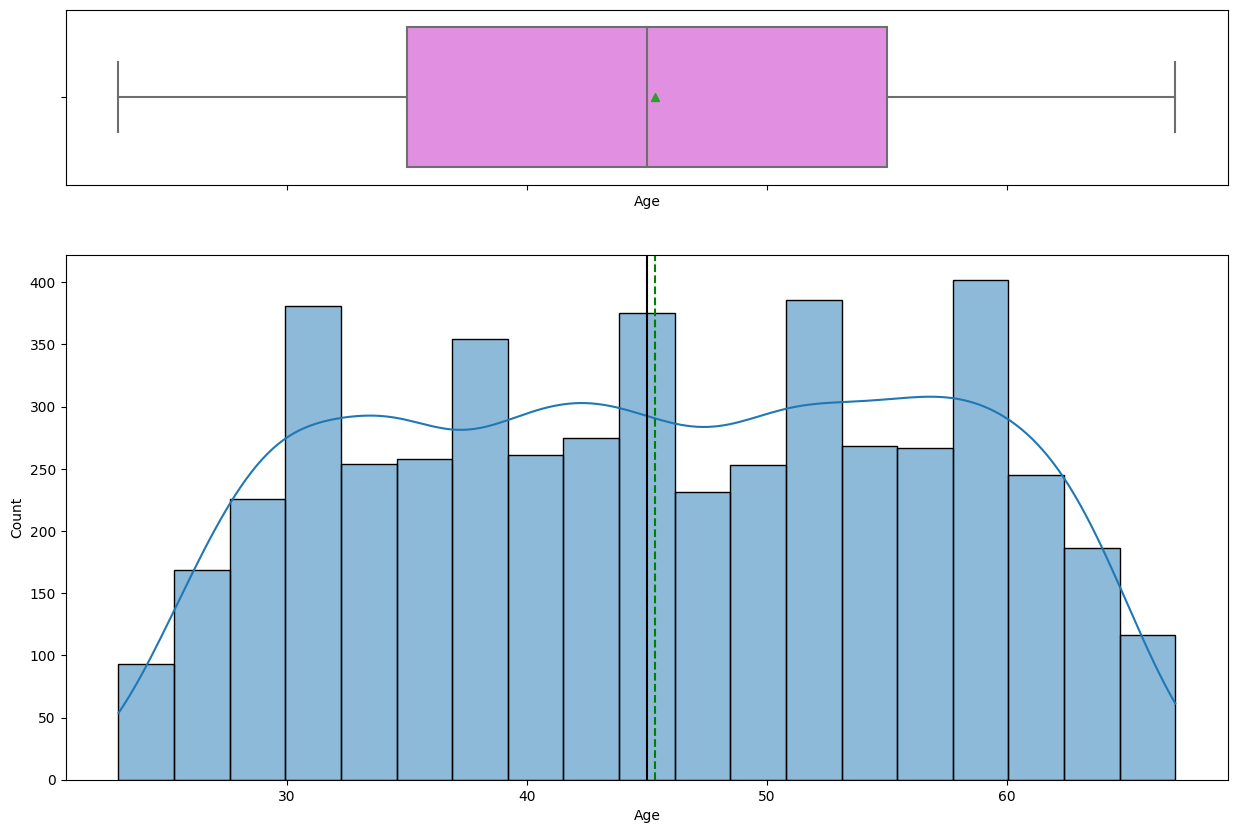

In [23]:
histogram_boxplot(data, 'Age')

* The `age` distribution in the dataset appears to be generally well-distributed, but it also exhibits 5 noticeable spikes or peaks.
* The `minimum age` recorded in the dataset is `23 years`.
* The `maximum age` recorded in the dataset is `67 years`.
* The `mean` and `median ages` in the dataset are both approximately `45 years` old.

**Observations on Experience**

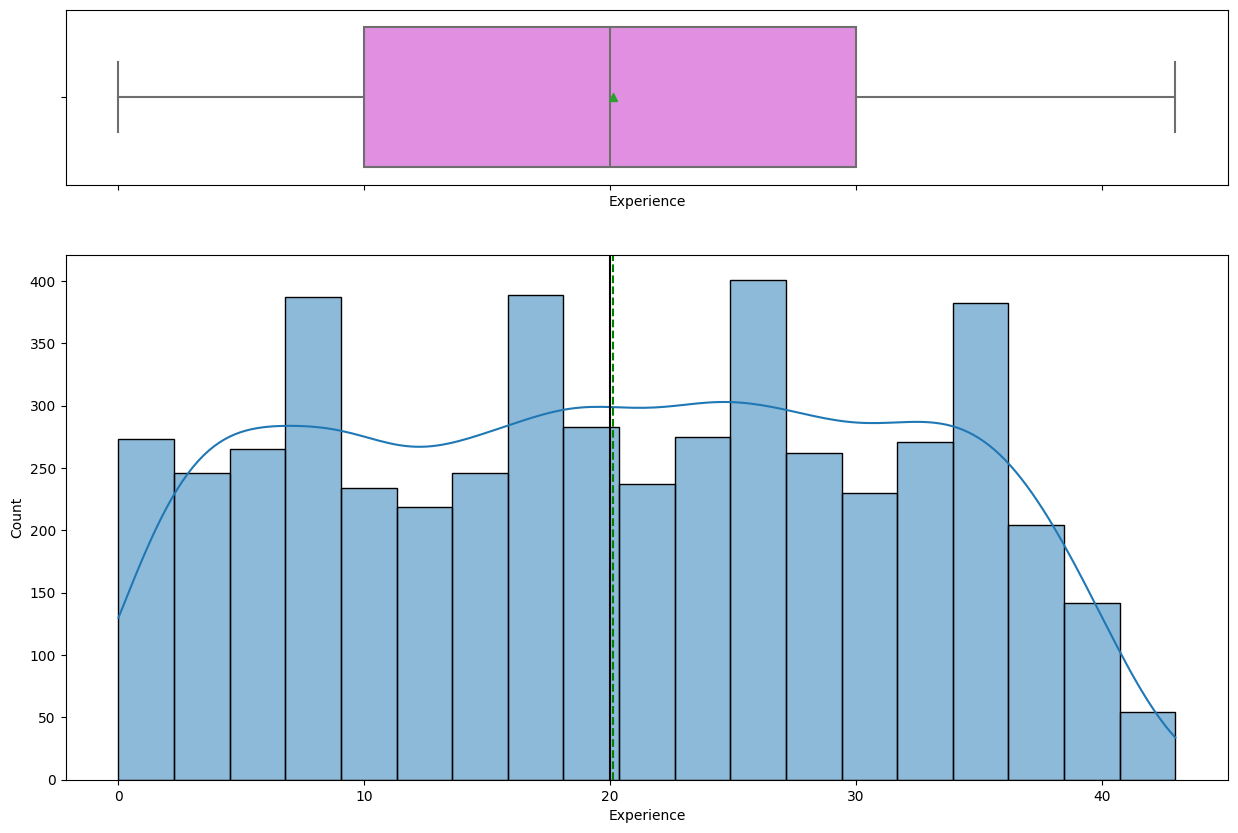

In [24]:
histogram_boxplot(data, 'Experience')

* The `Experience` distribution in the dataset appears to be generally well-distributed, but it also exhibits 4 noticeable spikes or peaks.
* The `minimum experience` recorded in the dataset is `0 years`.
* The `maximum experience` recorded in the dataset is `43 years`.
* The `mean` and `median experience` in the dataset are both approximately `20 years`.
* The similarity in the `distribution of experience` and `age` suggests a potential correlation between these two variables. Further analysis is warranted to explore and quantify the relationship between them.

**Observations on Income**

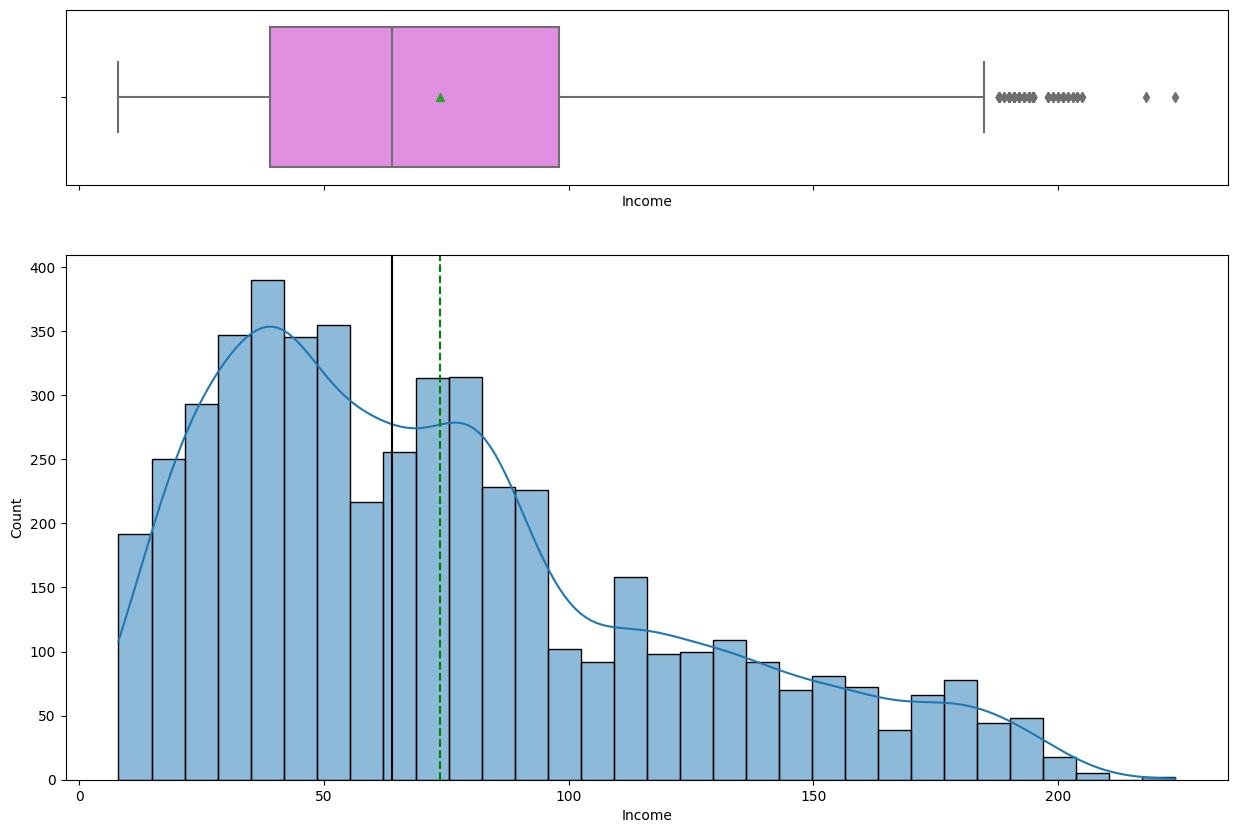

In [25]:
histogram_boxplot(data, 'Income')

* The `income` distribution is right-skewed, indicating that there are relatively fewer customers with high incomes and a larger concentration of customers with lower to moderate incomes in the dataset.
* The `income` dataset contains outliers, particularly in the higher income range. These outliers represent values significantly higher than the majority of the income data points and may warrant special attention in data analysis and modeling.
* The `income` range within the dataset spans from `$8,000` to `$224,000`.

**Observations on CCAvg**

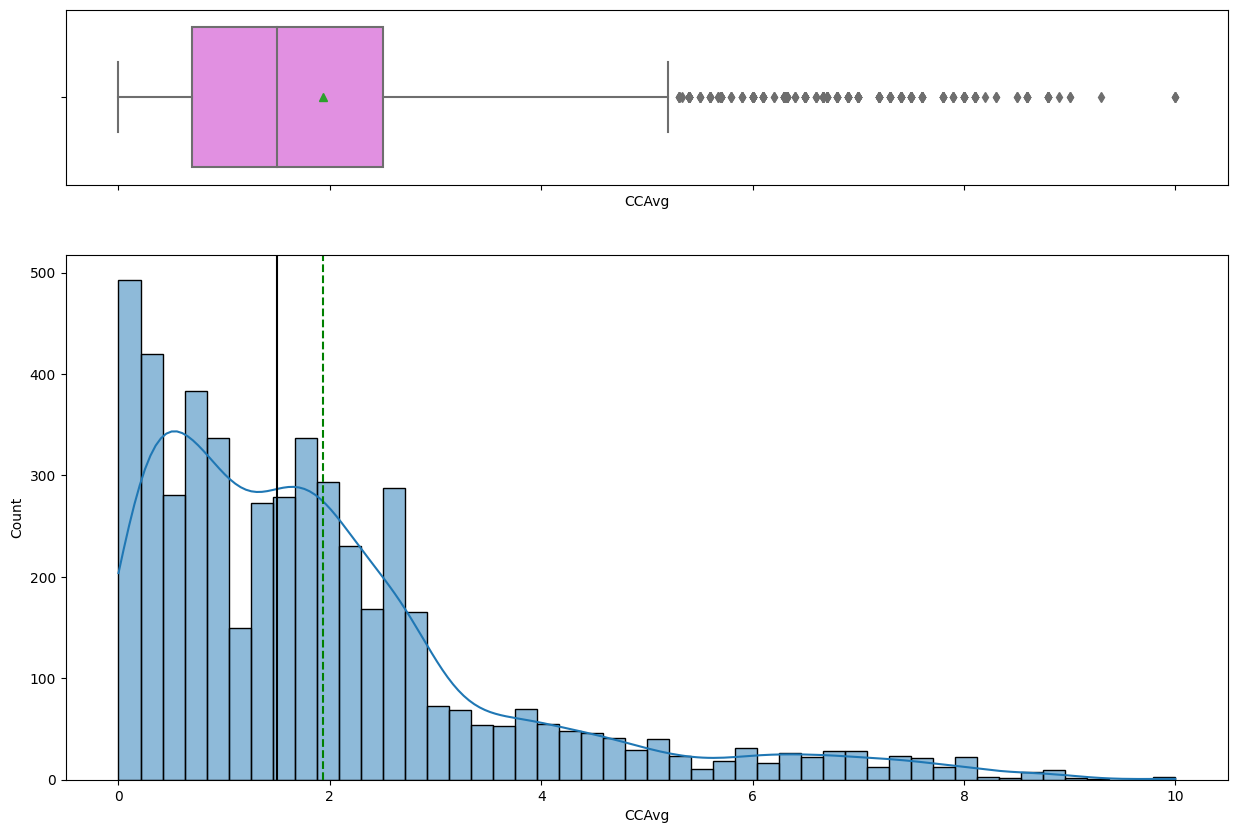

In [26]:
histogram_boxplot(data, 'CCAvg')

* `The `CCAvg` distribution is right-skewed, indicating that there are relatively fewer customers with high credit card spending, while the majority of customers have lower credit card spending in the dataset.

* The presence of numerous outliers on the higher side of the `CCAvg` distribution suggests that further validation and potential treatment may be necessary.


**Observations on Mortgage**

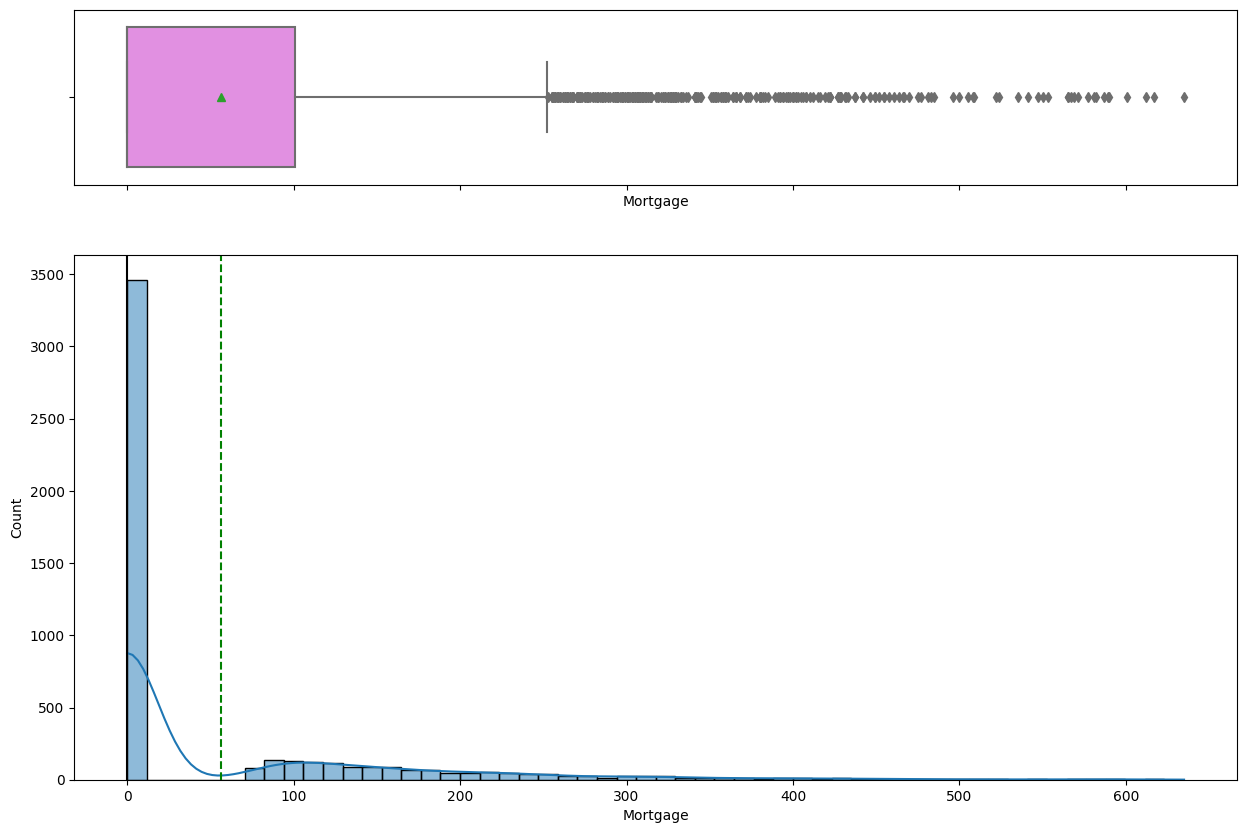

In [27]:
histogram_boxplot(data, 'Mortgage')

* The `Mortgage` variable is highly right-skewed, indicating that the majority of customers in the dataset have lower mortgage values, while there are relatively few with very high mortgage amounts.
* The range of `mortgage` values in the dataset spans from `$0` to `$635,000`.
* The presence of numerous outliers on the higher side of the `Mortgage` distribution suggests the need for validation and potential treatment.

**Observations on Family**

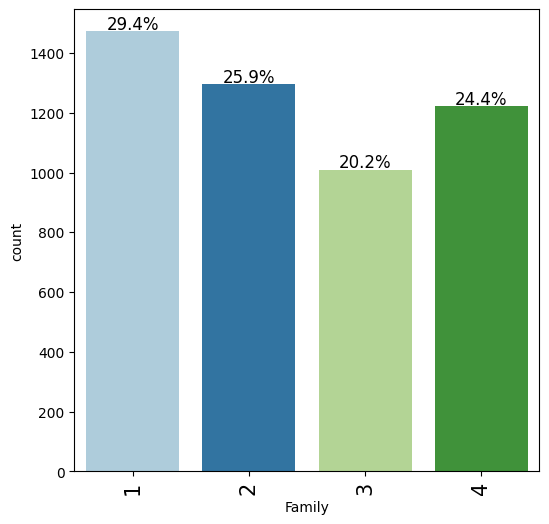

In [28]:
labeled_barplot(data, 'Family', perc=True)

* Among the customers, only `29.4%` are singles, while `25.9%` are in households with two family members.

**Observations on Education**

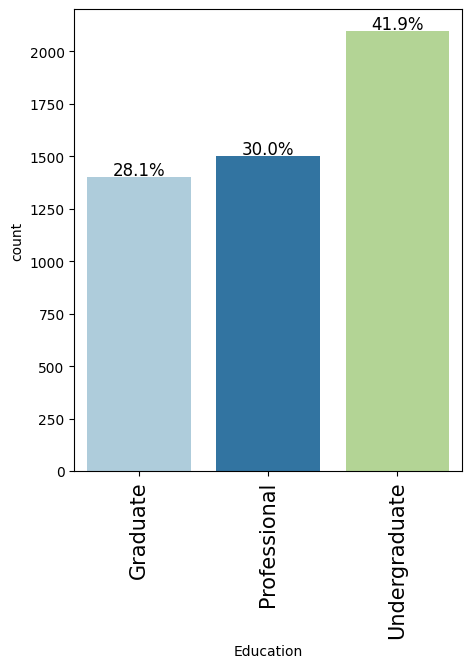

In [29]:
labeled_barplot(data, 'Education', perc=True)

* A total of `41.9%` of customers have completed an `undergraduate degree`, and the next largest group consists of `30.0%` of customers who possess a `professional degree`.

**Observations on Securities_Account**

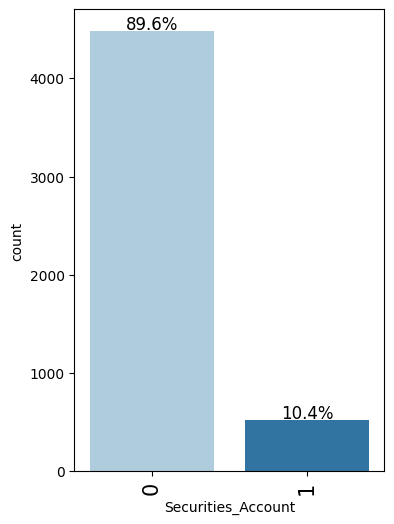

In [30]:
labeled_barplot(data, 'Securities_Account', perc=True)

* A mere 10.4% of the customers have a securities account with the bank.

**Observations on CD_Account**

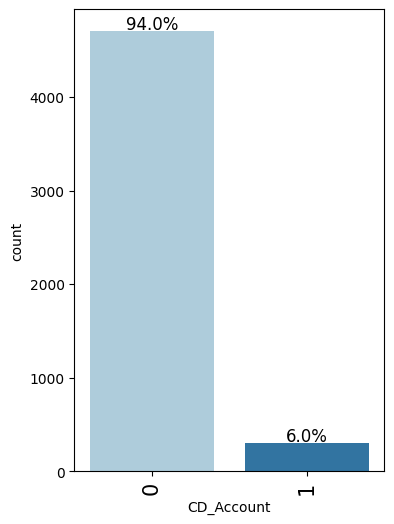

In [31]:
labeled_barplot(data, 'CD_Account', perc=True)

* Only `6.0%` of customers have a `CD_Account`, which is `4.4%` less than the proportion of customers with `Securities_Accounts`.

**Observations on Online**

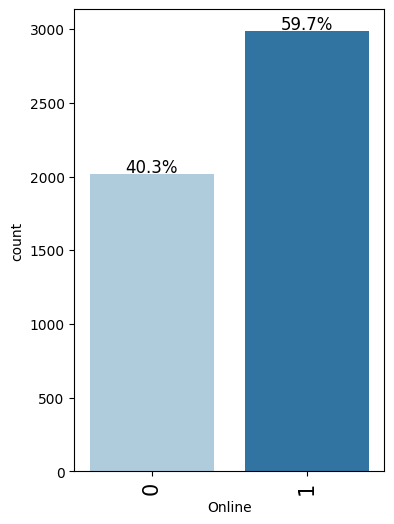

In [32]:
labeled_barplot(data, 'Online', perc=True)

* Approximately `59.7%` of customers use `internet banking facilities`.

**Observations on Credit Card**

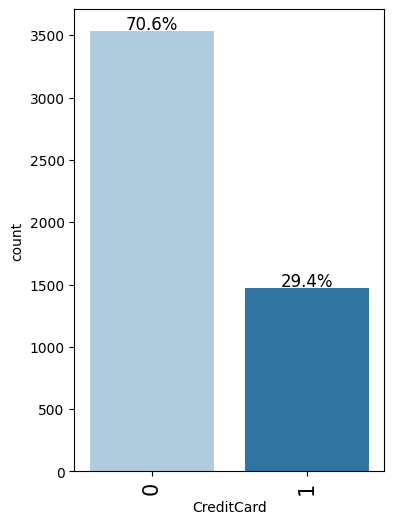

In [33]:
labeled_barplot(data, 'CreditCard', perc=True)

* Only `29.4%` of the customers have a `credit card`.

**Observations on Zip Code**

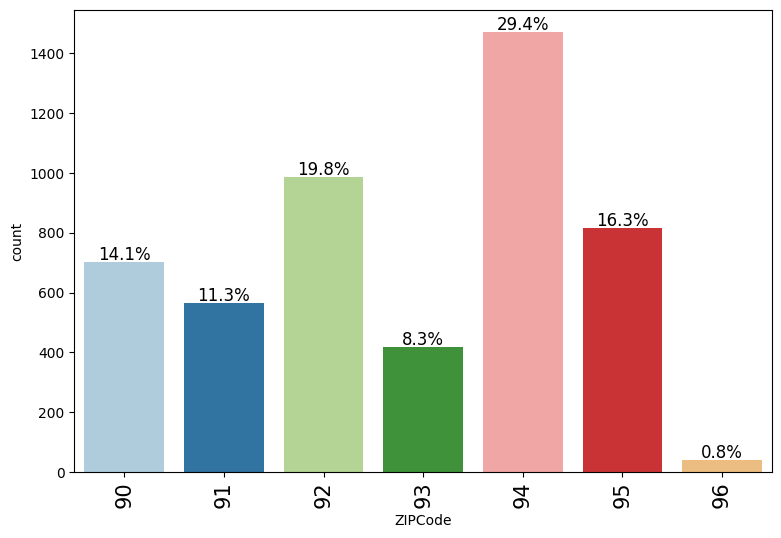

In [34]:
labeled_barplot(data, 'ZIPCode', perc=True)

* Roughly 29.4% of the customers reside in zip codes that begin with `94`.

In [35]:
# creating function for boxplot
def barplot(data, predictor, target):
    '''
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    '''
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print('-' * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind='bar', stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc='lower left', frameon=False,
    )
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [36]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title('Distribution of target for target=' + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color='teal',
        stat='density',
    )

    axs[0, 1].set_title('Distribution of target for target=' + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color='orange',
        stat='density',
    )

    axs[1, 0].set_title('Boxplot w.r.t target')
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette='gist_rainbow')

    axs[1, 1].set_title('Boxplot (without outliers) w.r.t target')
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette='gist_rainbow',
    )

    plt.tight_layout()
    plt.show()

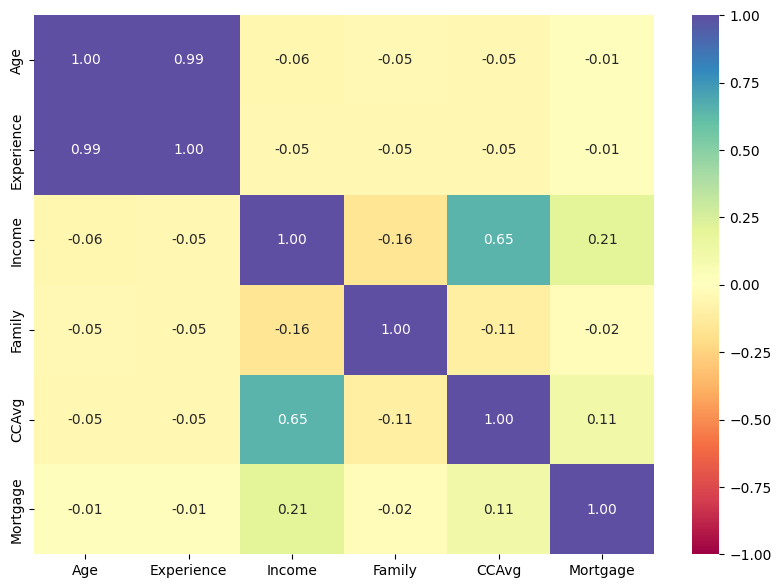

In [37]:
# checking correlation between all variables
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.show()

* `Age` and `Experience` are highly correlated variables in the dataset, indicating a strong positive relationship between a customer's `age` and their level of `professional experience`.
* Additionally, the variable `CCAvg`, representing the average spending on credit cards per month, is positively correlated with the `income` of the customers.
*  `Mortgage` is also correlated with both `income` and `CCAvg` the average spending on credit cards per month.

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


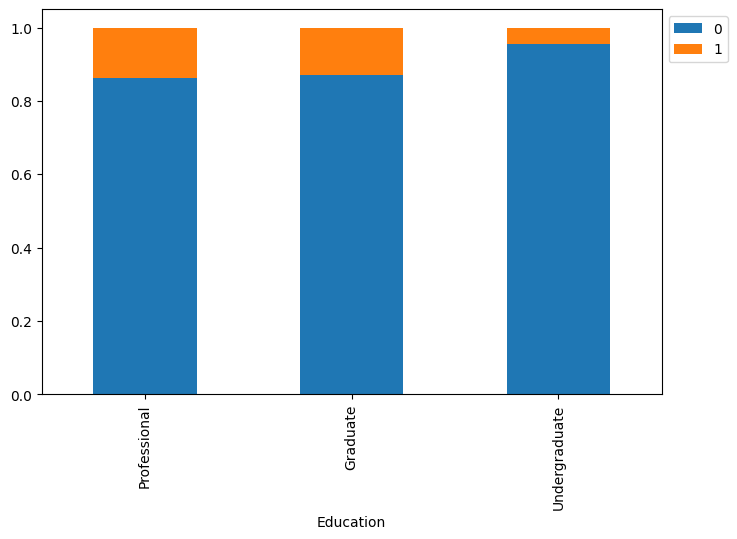

In [38]:
# checking education vs personal loan
barplot(data, 'Education', 'Personal_Loan')

* Out of the `5000 customers`, only `480 customers` have a `Personal Loan`. Among those with a `Personal Loan`, `205 customers` hold a `Professional degree`, followed by `182 customers` who have a `Graduate degree` and `93 customers` hold a `Undergraduate degree` .

**Personal_Loan vs Family**

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


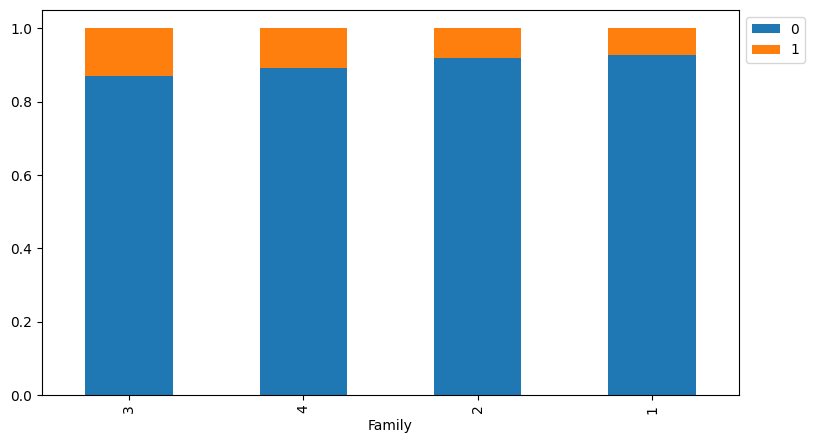

In [39]:
barplot(data, 'Family', 'Personal_Loan')

* Out of the `5000 customers`, only `480` have a `Personal Loan`. Of those with a Personal Loan, `134 customers` have a `household size of 4`, closely followed by `133 customers` with a `household size of 3`.
* Among the customers who are `single`, `107` of them have `Personal Loans`.
* There are `106 customers` with a `household size of 2` who have `Personal Loans`, which is slightly less than the number of single customers with `Personal Loans`.

**Personal_Loan vs Securities_Account**

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


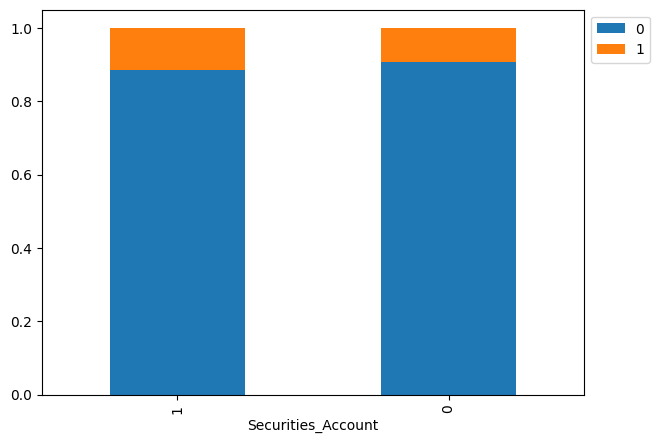

In [40]:
barplot(data, 'Securities_Account', 'Personal_Loan')

* Out of the `522 customers` with a `Securities_Account`, only `60` of them also have `Personal Loans`.
* Among the `4,478 customers` who do not have `Securities_Accounts`, `420` of them have `Personal Loans`.

**Personal_Loan vs CD_Account**

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


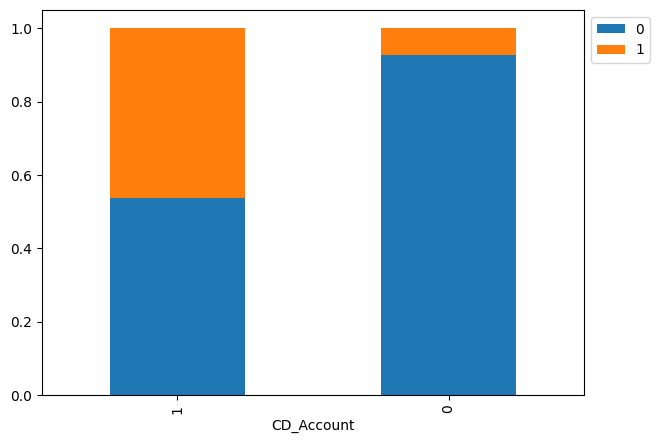

In [41]:
barplot(data, 'CD_Account', 'Personal_Loan')

* Out of the `4,698 customers` who do not have a `CD_Account`, `340 customers` have `Personal Loans`.
* Among the `302 customers` who have a `CD_Account`, `140` of them also have `Personal Loans`.

**Personal_Loan vs Online**

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


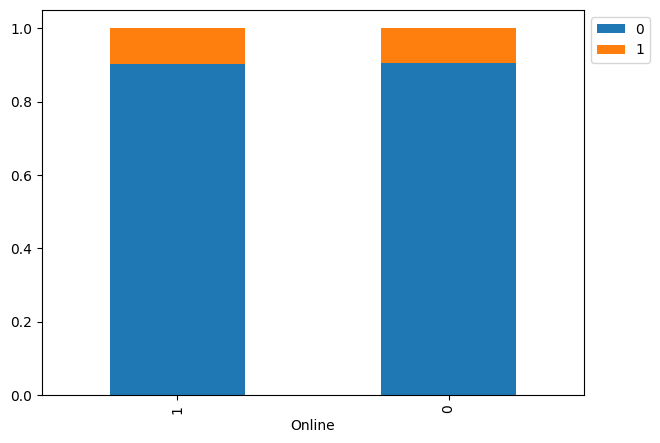

In [42]:
barplot(data, 'Online', 'Personal_Loan')

* Out of the `2,984 customers` who use internet banking facilities, `291` of them have `Personal Loans`.
* Among the `2016 customers` who do not use internet banking, only `189` of them have `Personal Loans`.

**Personal_Loan vs CreditCard**

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


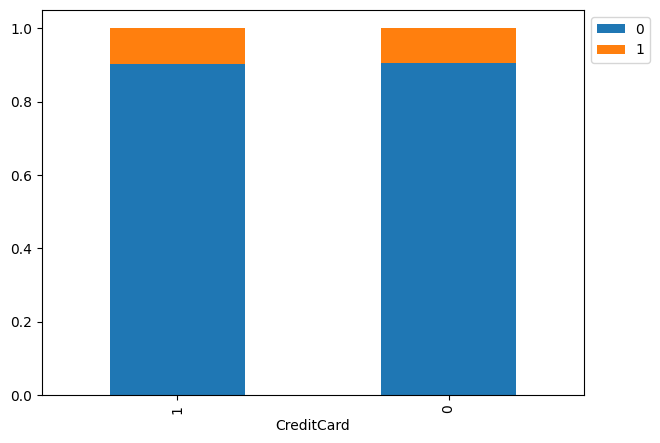

In [43]:
barplot(data, 'CreditCard', 'Personal_Loan')

* Out of the `480 customers` with `Personal Loans`, `337` of them do not possess any `credit card`, while the remaining `143 customers` have a `credit card`.

**Personal_Loan vs ZIPCode**

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


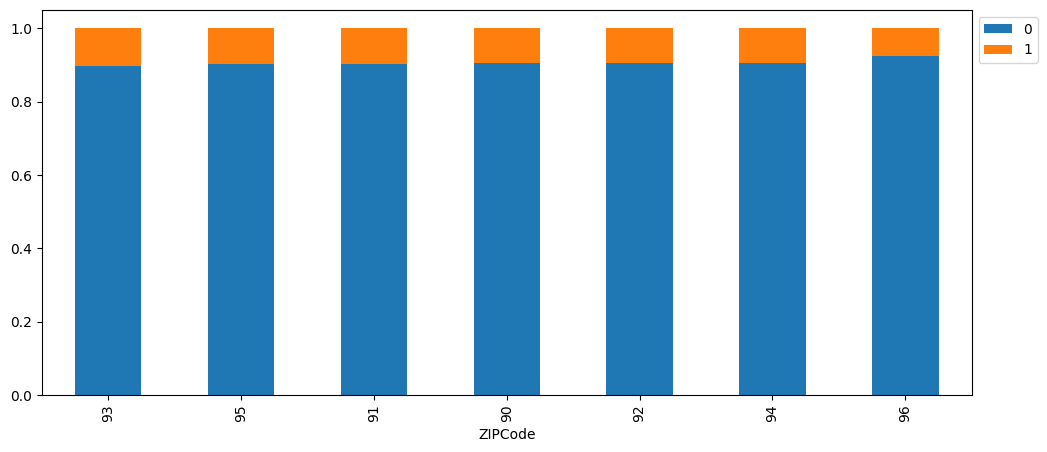

In [44]:
barplot(data, 'ZIPCode', 'Personal_Loan')

**Personal Loan vs Age**

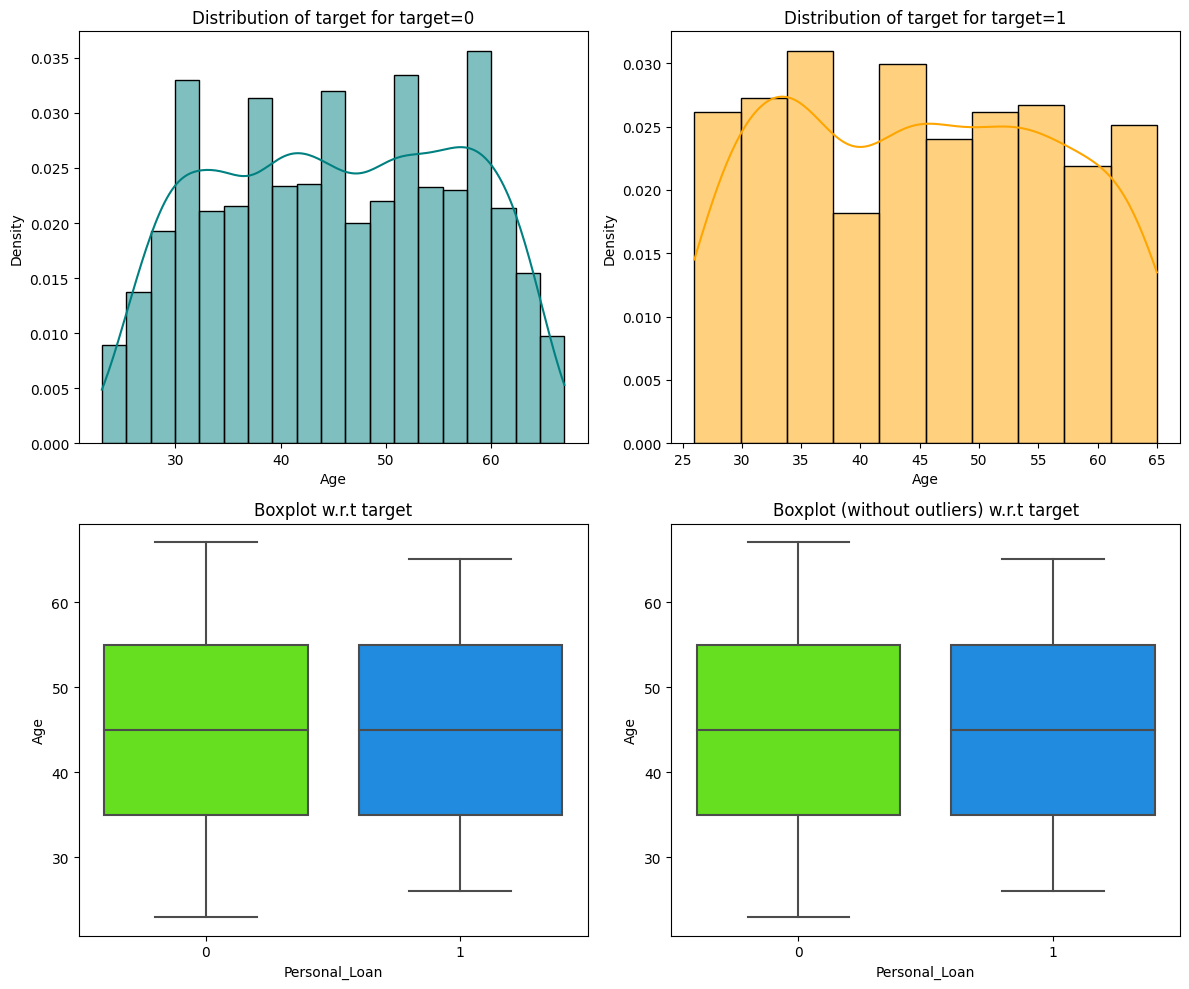

In [45]:
distribution_plot_wrt_target(data, 'Age', 'Personal_Loan')

* It seems that there is no discernible clustering pattern when comparing the choice to opt for a `Personal Loan` with respect to age. This suggests that `age` alone may not be a strong indicator or factor in predicting whether a customer will choose to take a Personal Loan or not. Other variables and features may play a more significant role in this decision.

**Personal Loan vs Experience**

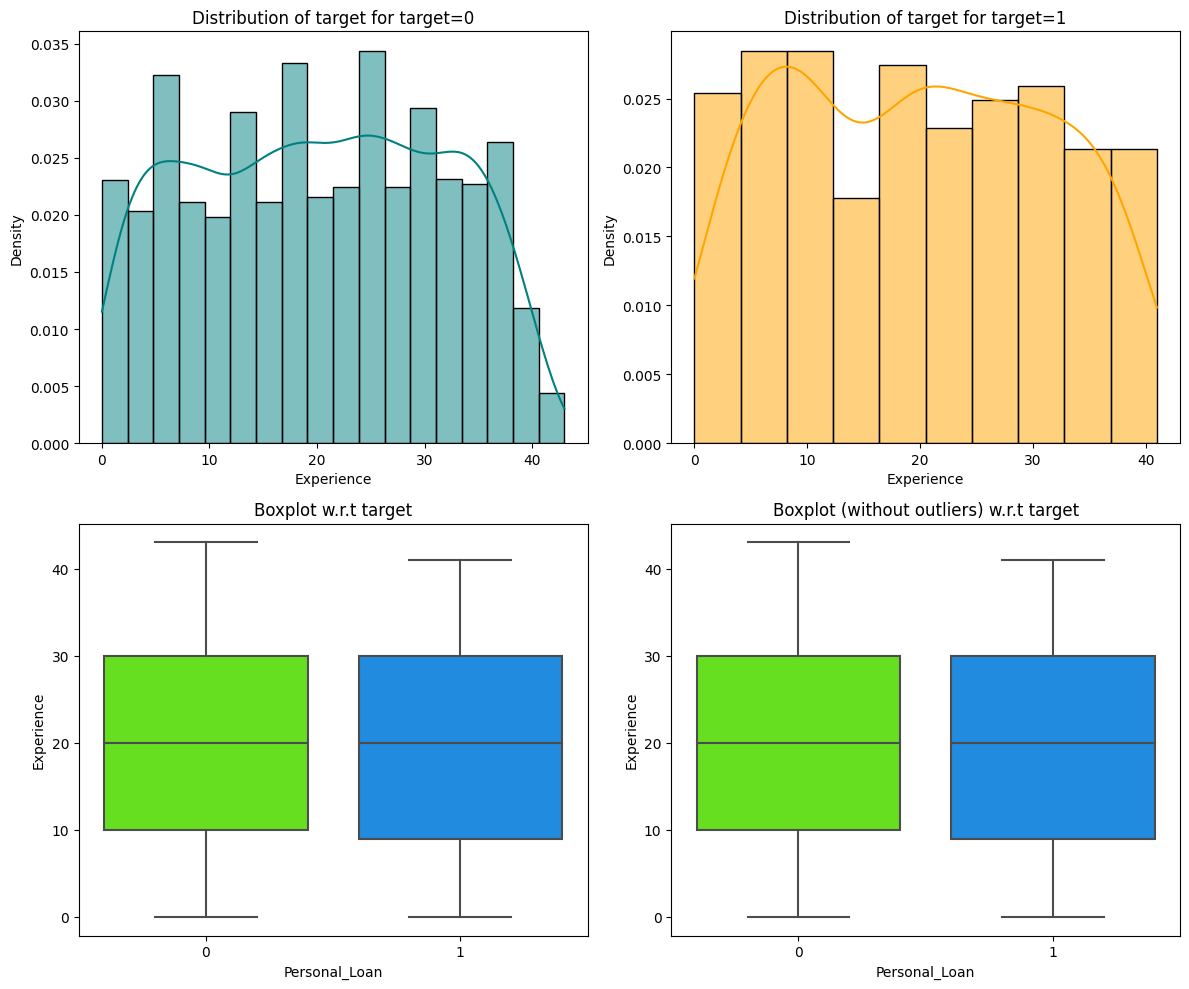

In [46]:
distribution_plot_wrt_target(data, 'Experience', 'Personal_Loan')

* It appears that there is no evident clustering pattern when considering the choice to opt for a `Personal Loan` in relation to `Experience`. This observation suggests that experience alone may not be a strong predictor of whether a customer will choose to take a Personal Loan or not. Other factors and variables may have a more substantial influence on this decision.

**Personal Loan vs Income**

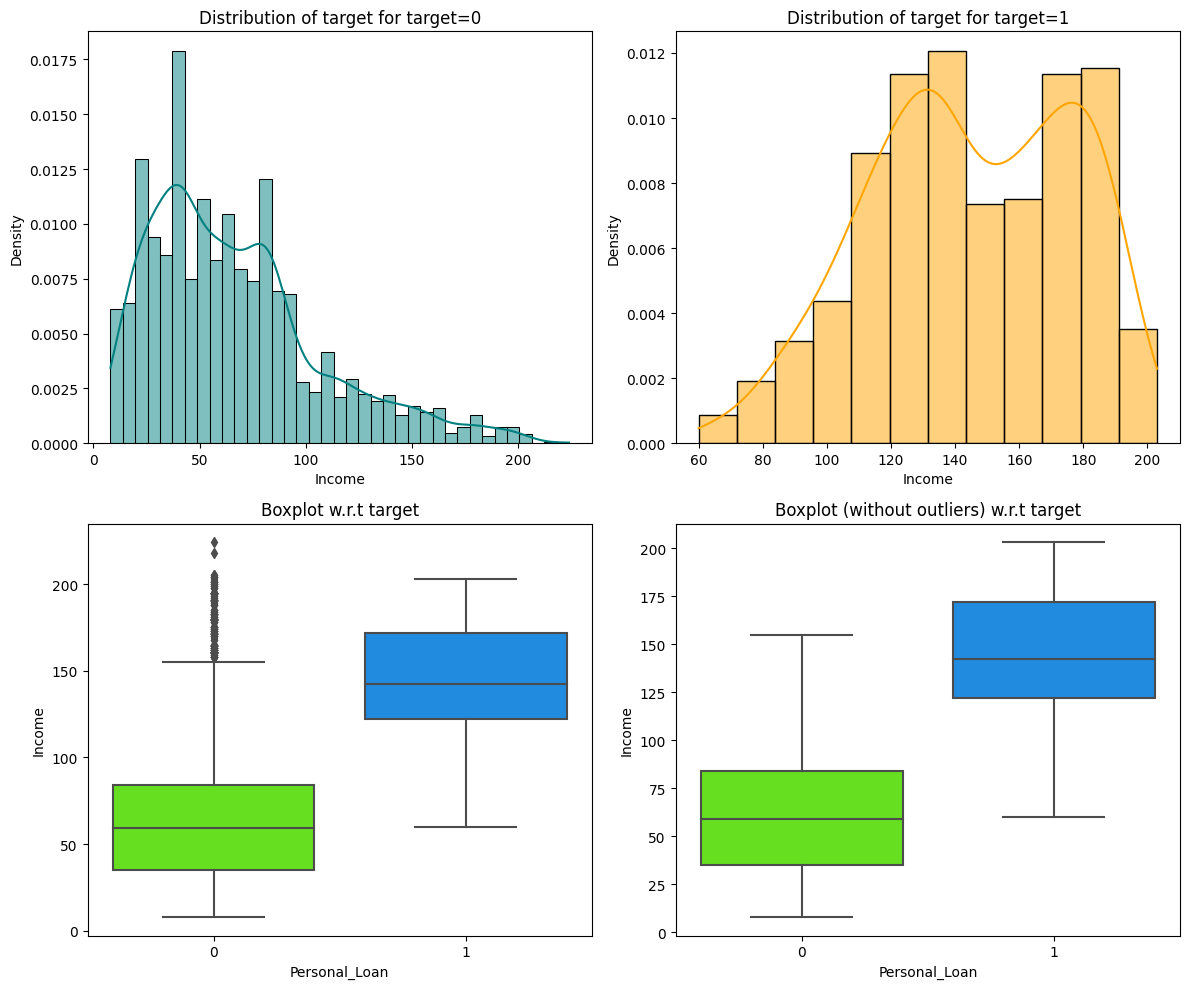

In [47]:
distribution_plot_wrt_target(data, 'Income', 'Personal_Loan')

* It seems that `customers` with `higher income` are more likely to have taken a `Personal Loan`.
* There are notable outliers among the `customers` who have not taken a `Personal Loan`, especially those with `incomes` exceeding `$152,000`.

**Personal Loan vs CCAvg**

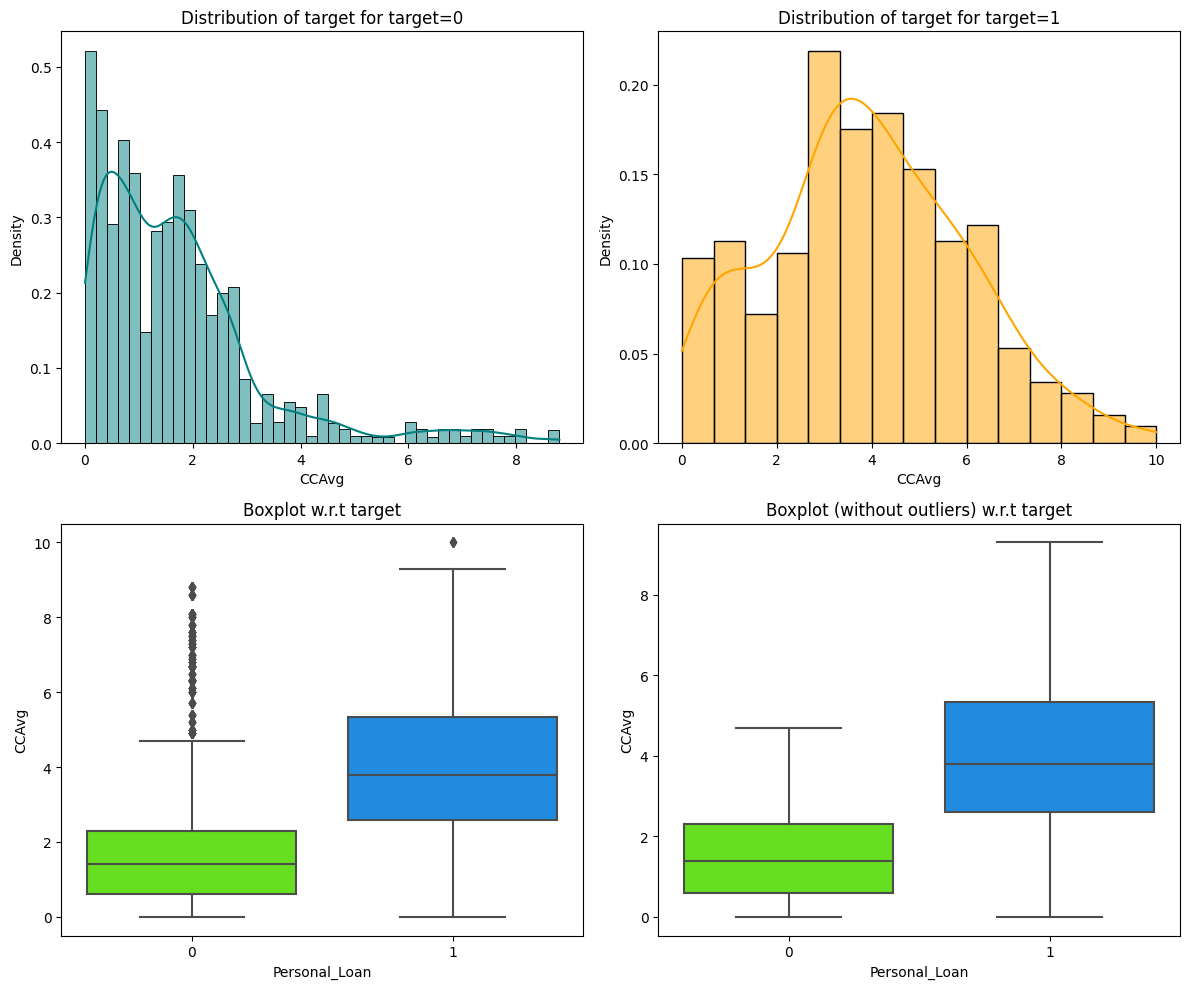

In [48]:
distribution_plot_wrt_target(data, 'CCAvg', 'Personal_Loan')

* It appears that customers with higher average spending on credit cards per month (CCAvg) are more likely to opt for a Personal Loan.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [49]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,5000.0,NaN,NaN,NaN,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,NaN,NaN,NaN,20.1346,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,NaN,NaN,NaN,73.7742,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000,7,94,1472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family,5000.0,NaN,NaN,NaN,2.3964,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,NaN,NaN,NaN,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000,3,Undergraduate,2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,5000.0,NaN,NaN,NaN,56.4988,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,2.0,0.0,4520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Securities_Account,5000.0,2.0,0.0,4478.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Outlier Detection**

In [50]:
Q1 = data.quantile(0.25)  # 25th percentile
Q3 = data.quantile(0.75)  # 75th percentile

IQR = Q3 - Q1               # inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [51]:
((data.select_dtypes(include=['float64', 'int64']) < lower)
    |(data.select_dtypes(include=['float64', 'int64']) > upper)
).sum() / len(data) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

* `Income`, `CCAvg`, and `Mortgage` needs outliners treatment.

**Treating Outliers**

In [52]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1 = data[col].quantile(0.25) # 25th quantile
    Q3 = data[col].quantile(0.75)  # 75th quantile

    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], lower, upper)

    # all the values smaller than lower will be assigned value of lower
    # and all the values above upper will be assigned value of upper
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for i in col_list:
        data = treat_outliers(data,i)

    return data



In [53]:
def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for i in col_list:
        data = treat_outliers(data,i)

    return data

In [54]:
# getting list of numerical columns
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

numerical_col.remove('Age')
numerical_col.remove('Family')

# treating outliers
data = treat_outliers_all(data,numerical_col)

Verifying outlier treatment

In [55]:
((data.select_dtypes(include=['float64', 'int64']) < lower)
    |(data.select_dtypes(include=['float64', 'int64']) > upper)
).sum() / len(data) * 100

Age           0.0
Experience    0.0
Income        0.0
Family        0.0
CCAvg         0.0
Mortgage      0.0
dtype: float64

**Data Preparation for Modeling**

In [56]:
# separating independent and dependent variable
X = data.drop(['Personal_Loan', 'Experience'], axis=1)
Y = data['Personal_Loan']

In [57]:
# creating dummies varables on ZIPCode and Education
X = pd.get_dummies(data=X, columns=['Education', 'ZIPCode'], drop_first=True)

In [58]:
# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state = 1)

In [59]:
print('Shape of Training set : ',X_train.shape )
print('Shape of test set : ',X_test.shape )
print('Percentage of classes in training set:\n',y_train.value_counts(normalize=True)*100)
print('Percentage of classes in test set:\n',y_test.value_counts(normalize=True)*100)

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
 0    90.542857
1     9.457143
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
 0    90.066667
1     9.933333
Name: Personal_Loan, dtype: float64


The dataset has been divided into training and testing sets, and in both datasets, the target variable exhibits a distribution with approximately a 91:9 ratio for the values 0 and 1, respectively.

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**


1.   Predicting that a customer will take out a loan when they actually do not can result in a **Loss of resources**.
2.   Predicting that a customer will not take out a loan when they actually do, resulting in a `false negative` prediction, can indeed lead to a **Loss of opportunity**.

**Which case is more important?**

* The primary goal of the campaign is to attract more customers, and in this context, the second case, where a potential customer is missed by the sales/marketing team, is of greater importance. This is because failing to capture a potential customer represents a significant loss of opportunity.

* In light of this priority, the evaluation criteria for the campaign should be centered around minimizing the loss of opportunity. Strategies, models, and actions should be designed to identify and reach out to as many potential customers as possible to maximize the campaign's success and capture new opportunities for the business.

**How to reduce this loss i.e need to reduce False Negatives?**

* Bank should focus on `Recall`. A `high Recall` ensures a lower rate of `false negatives`, which is crucial when identifying potential customers.


### Model Building

We are creating several functions to evaluate model performance and display the confusion matrix.

In [60]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    '''
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    '''

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute accuracy
    recall = recall_score(target, pred)  # to compute recall
    precision = precision_score(target, pred)  # to compute precision
    f1 = f1_score(target, pred)  # to compute f1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1': f1,},
        index=[0],
    )

    return df_perf

In [61]:
def confusion_matrix_sklearn(model, predictors, target):
    '''
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    '''
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Build Decision Tree Model**

In [62]:
# initializing the decision tree classifier
model = DecisionTreeClassifier(criterion='gini', random_state=1)
model.fit(X_train, y_train)  ## Complete the code to fit decision tree on train data

DecisionTreeClassifier(random_state=1)

**Checking model performance on training data**

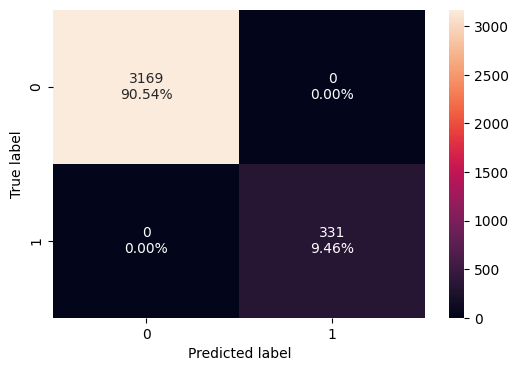

In [63]:
confusion_matrix_sklearn(model, X_train, y_train)

In [64]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we are aware, a decision tree will expand and accurately classify each data point when no constraints are applied, as the trees have the capacity to learn all patterns present in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

**Checking model performance on test set**

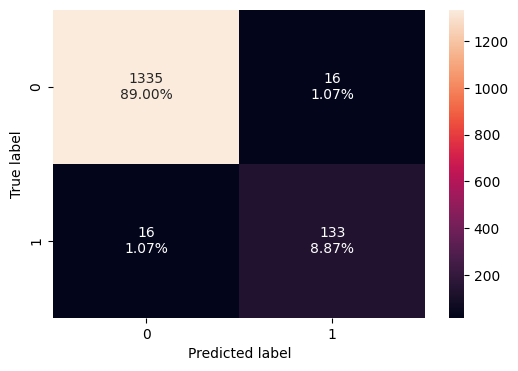

In [65]:
confusion_matrix_sklearn(model, X_test, y_test)

In [66]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.978667,0.892617,0.892617,0.892617


* Model performs exceptionally well on the training data but doesn't generalize as well to Test data, unseen data.

**Visualizing the Decision Tree**

In [67]:
## creating a list of column names
feature_names = X_train.columns.to_list()

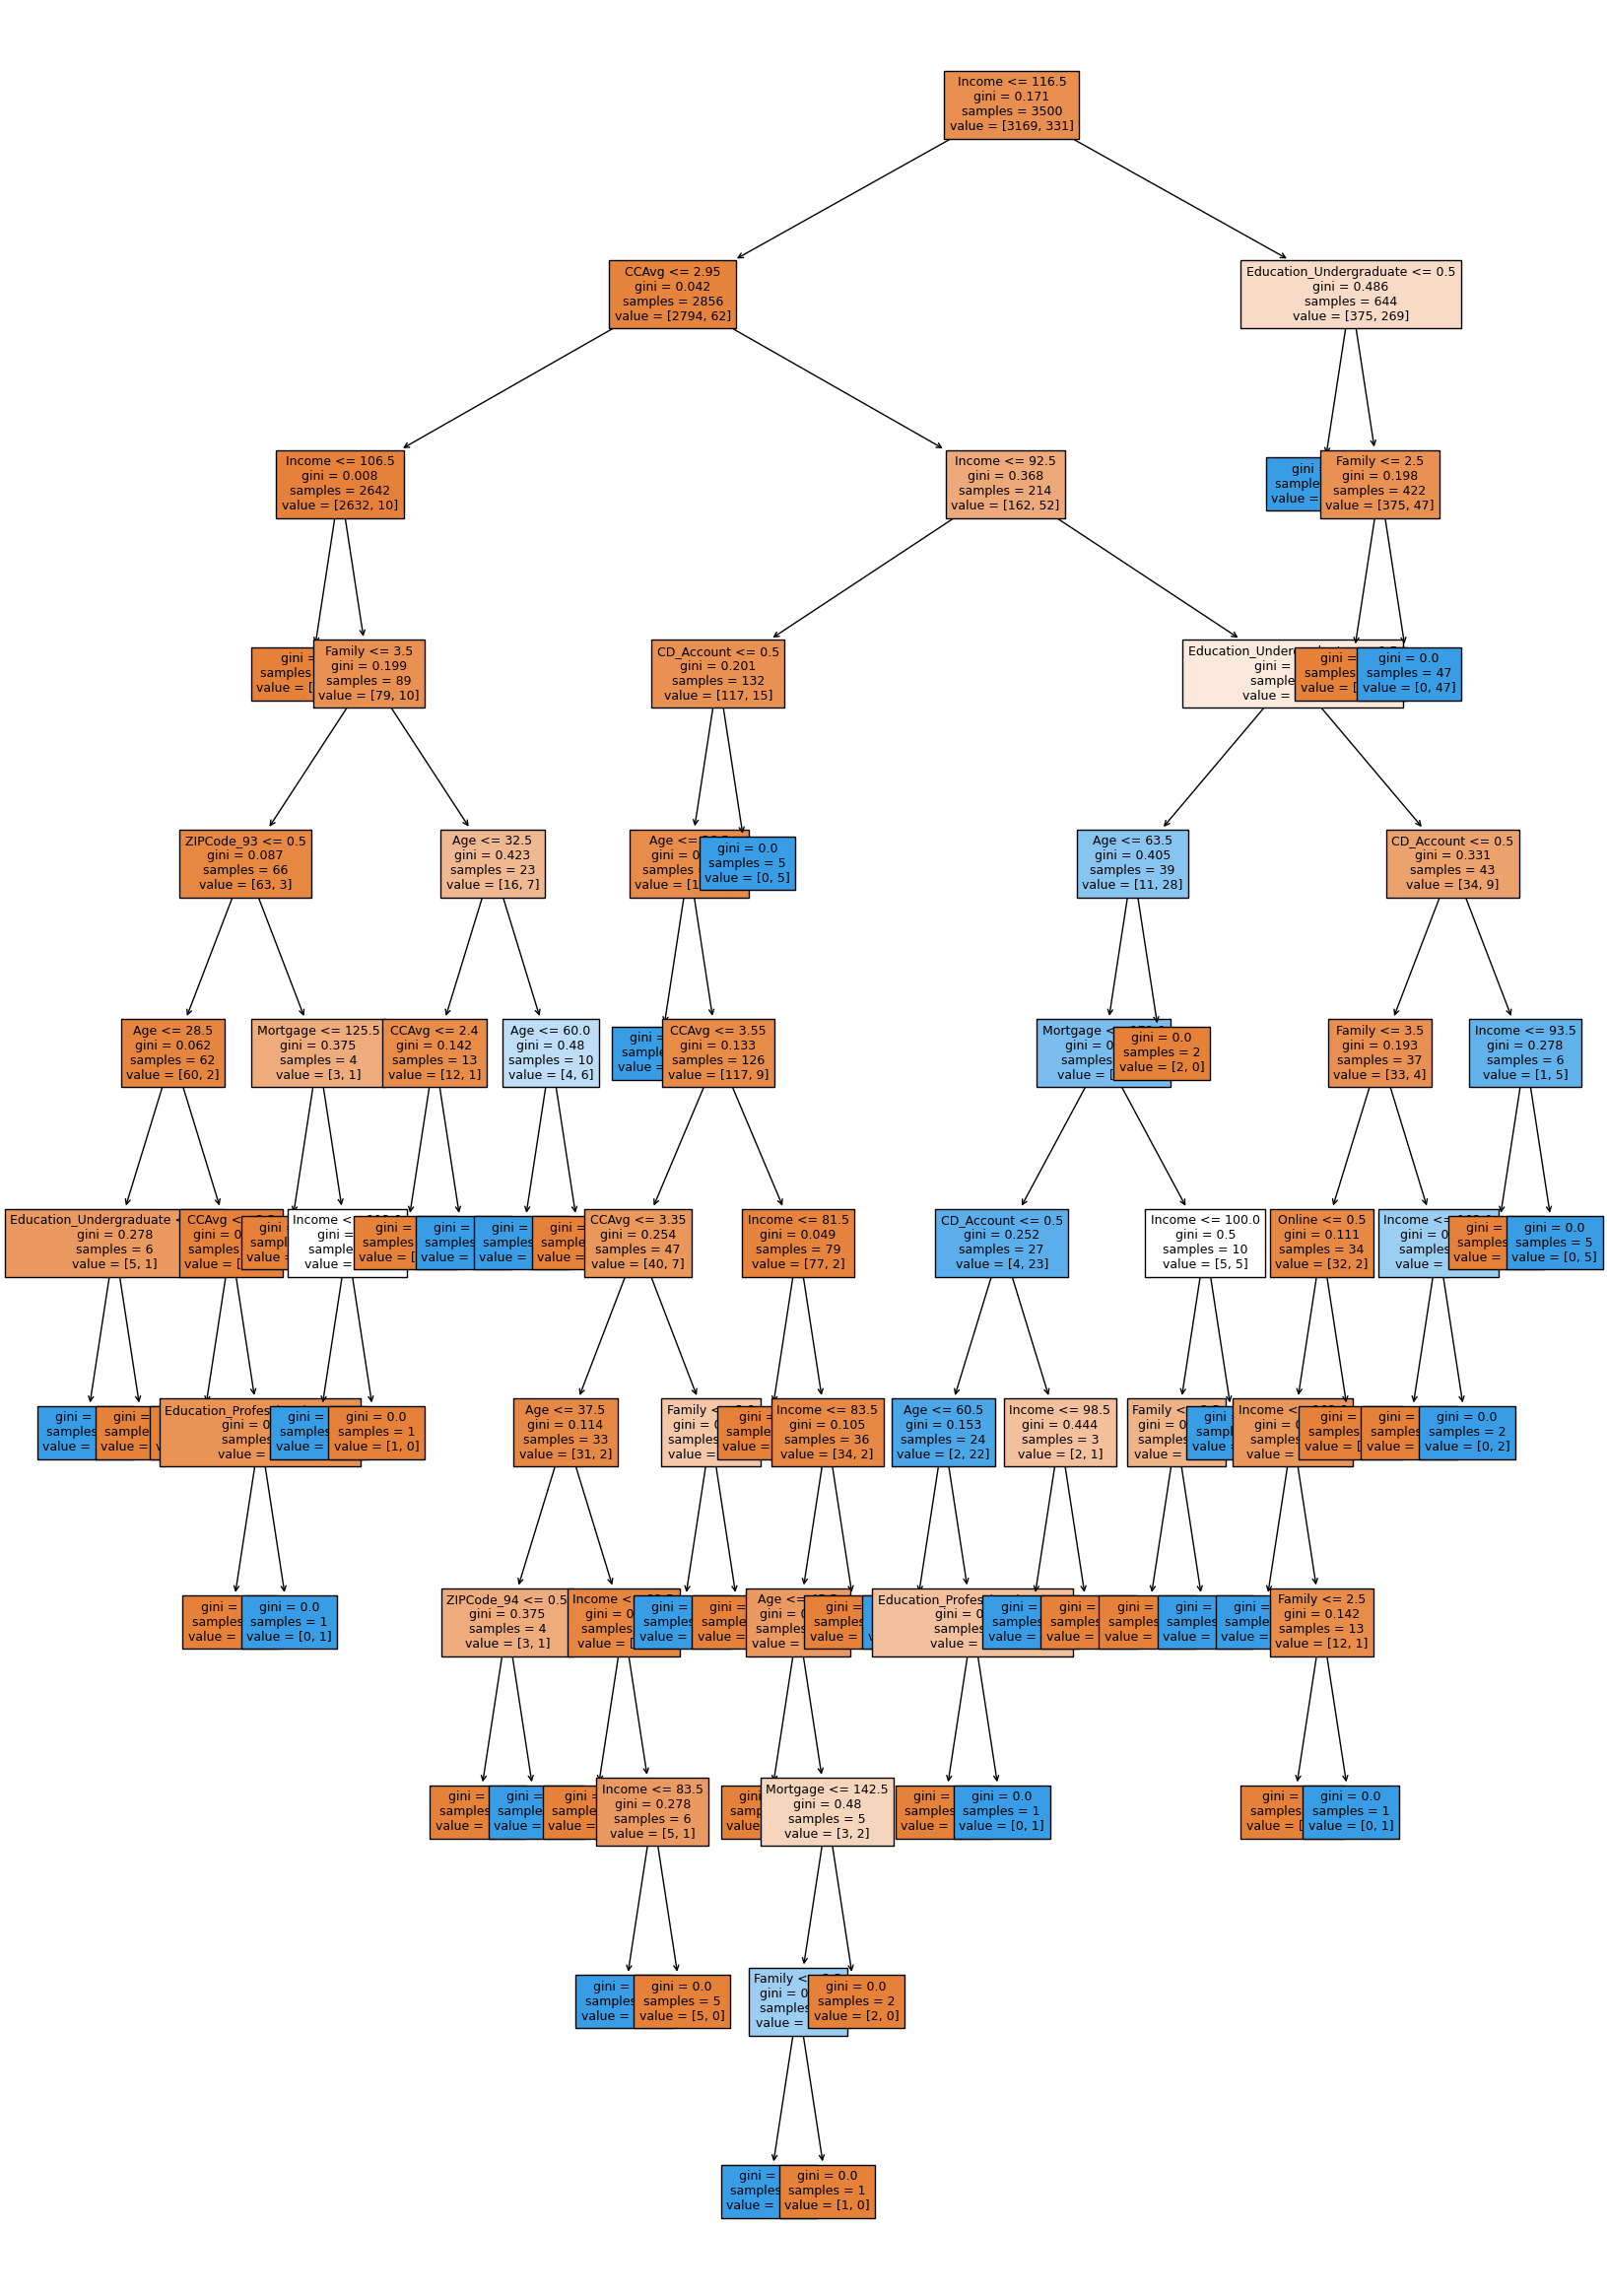

In [68]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [69]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93

* The tree above is very complex and difficult to interpret.

In [70]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=['Imp'], index=X_train.columns
    ).sort_values(by='Imp', ascending=False)
)

                              Imp
Education_Undergraduate  0.403732
Income                   0.317094
Family                   0.167368
CCAvg                    0.045621
Age                      0.026044
CD_Account               0.025711
Mortgage                 0.005628
Education_Professional   0.005144
ZIPCode_94               0.002503
ZIPCode_93               0.000594
Online                   0.000561
ZIPCode_95               0.000000
CreditCard               0.000000
ZIPCode_92               0.000000
ZIPCode_91               0.000000
Securities_Account       0.000000
ZIPCode_96               0.000000


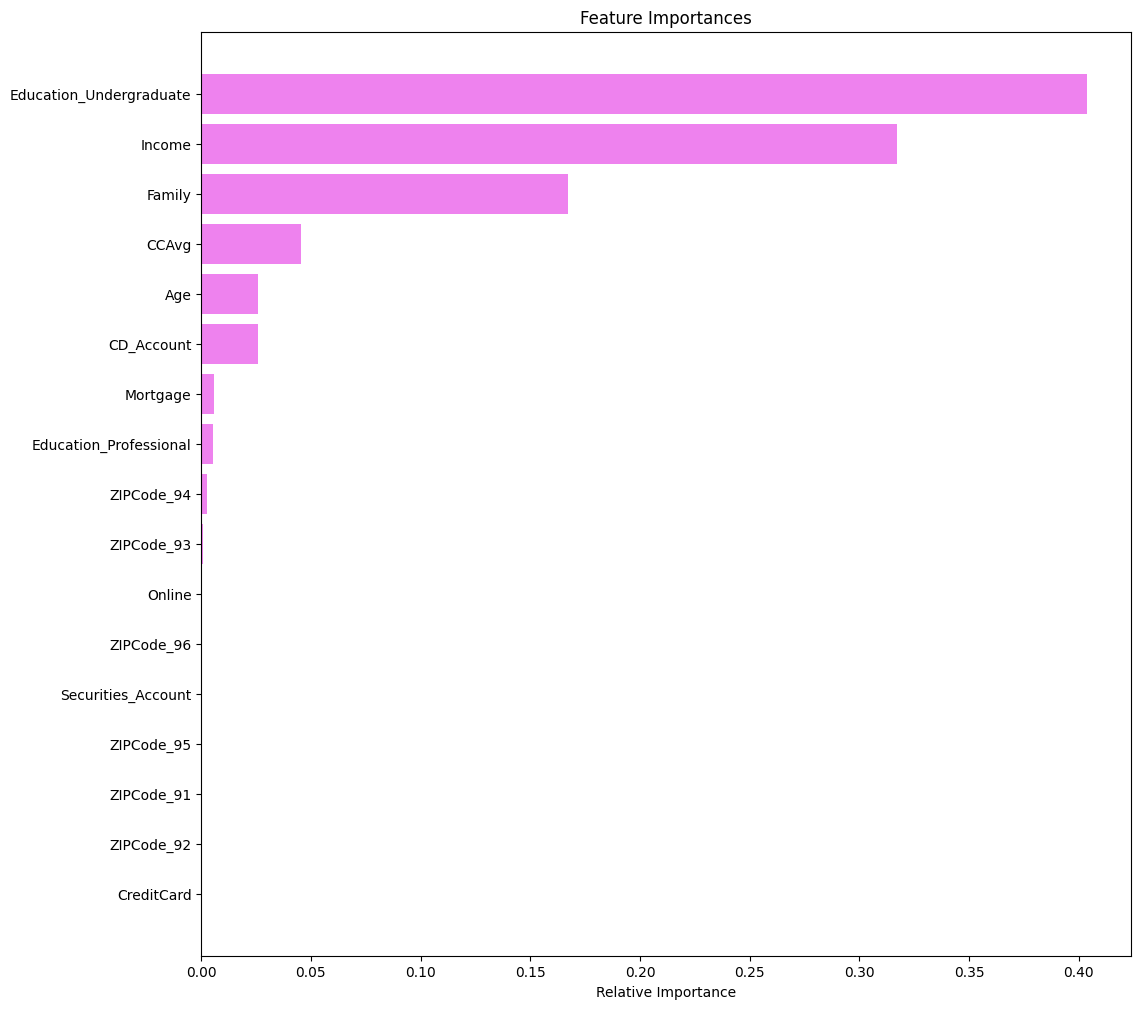

In [71]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decision tree model, `Education_Undergraduate` and `Income`are the most important variable for predicting the Personal_Loans.

### Model Performance Improvement

**Pre-Pruning**

In [72]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(6,15),
    'min_samples_leaf': [1, 2, 5, 7, 10],
    'max_leaf_nodes': [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

**Checking performance on training set**

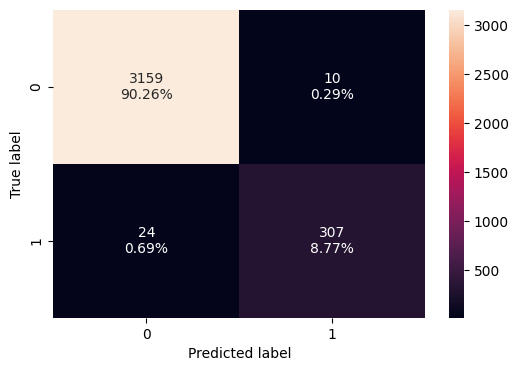

In [73]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [74]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.990286,0.927492,0.968454,0.947531


**Checking performance on test set**

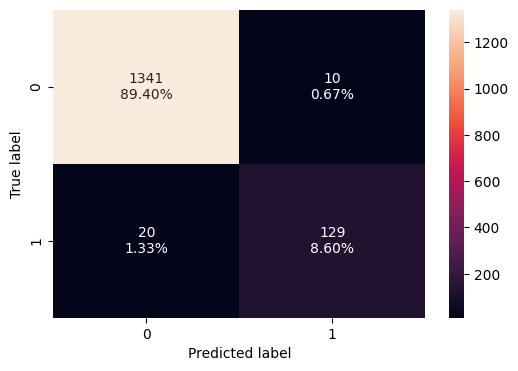

In [75]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [76]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


**Visualizing the Decision Tree**

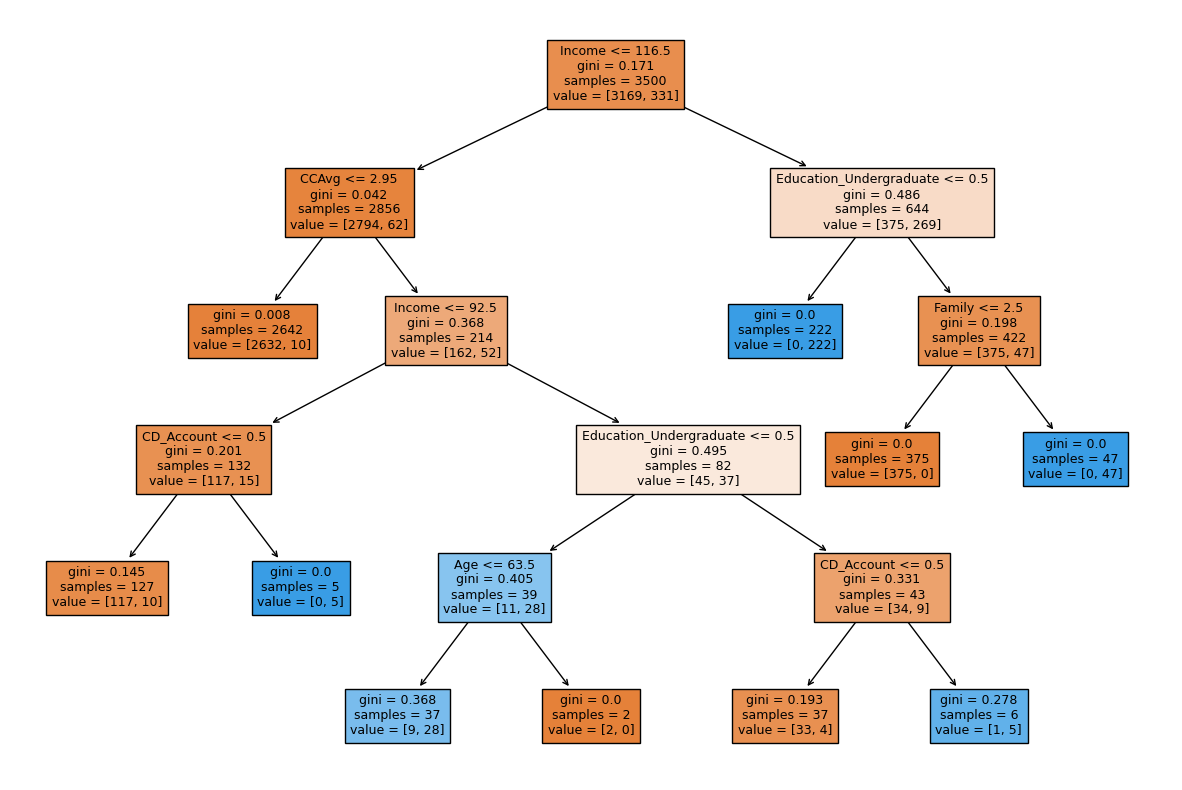

In [77]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [78]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|--- Income >  116.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.

In [79]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=['Imp'], index=X_train.columns
    ).sort_values(by='Imp', ascending=False)
)

# Here we will see that importance of features has increased

                              Imp
Education_Undergraduate  0.446191
Income                   0.327387
Family                   0.155083
CCAvg                    0.042061
CD_Account               0.025243
Age                      0.004035
ZIPCode_91               0.000000
ZIPCode_95               0.000000
ZIPCode_94               0.000000
ZIPCode_93               0.000000
ZIPCode_92               0.000000
CreditCard               0.000000
Education_Professional   0.000000
Online                   0.000000
Securities_Account       0.000000
Mortgage                 0.000000
ZIPCode_96               0.000000


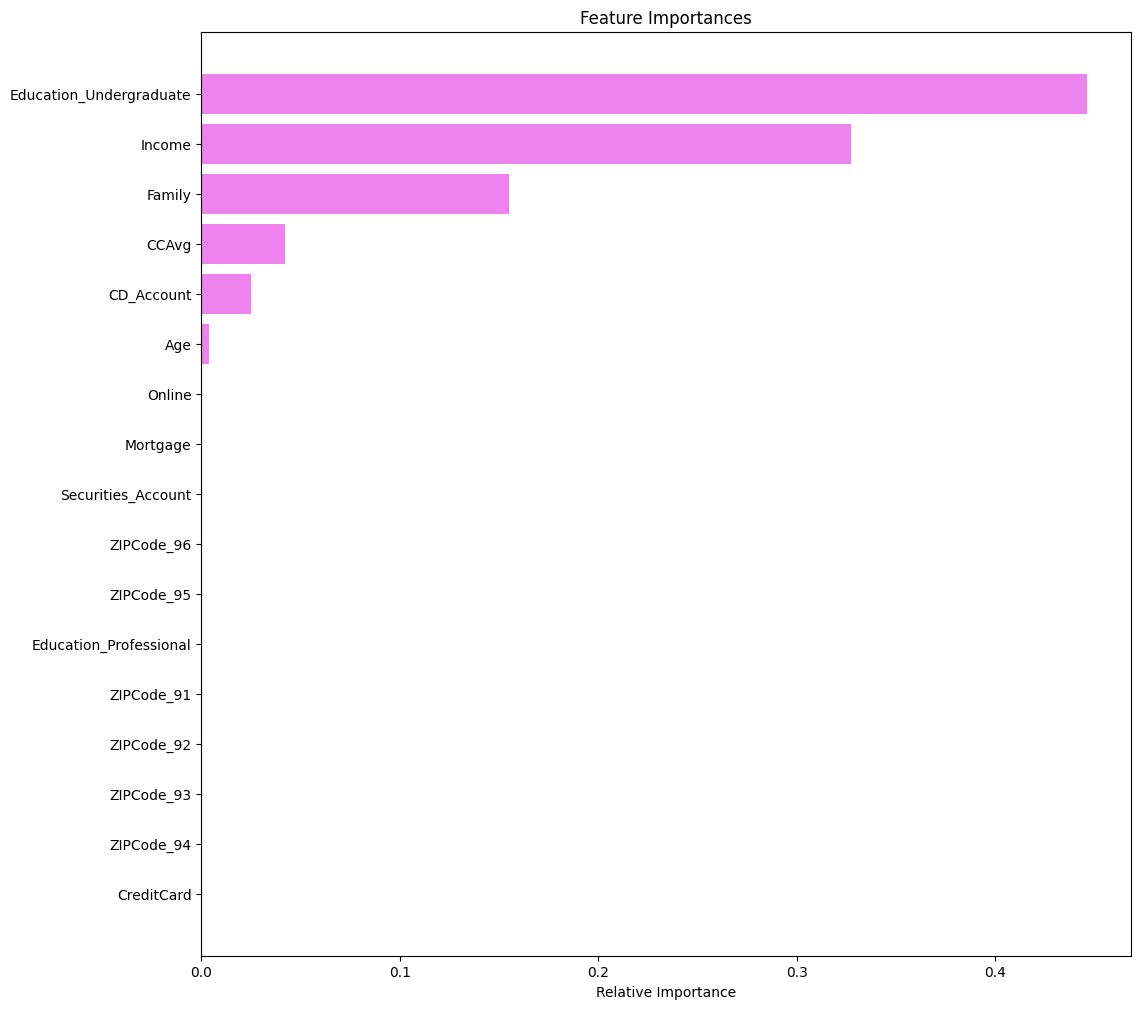

In [80]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* In tuned decision tree `Education_Undergraduate` is the most important feature followed by Income.

**Cost-Complexity Pruning**

In [81]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [82]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000214,0.000429
2,0.000223,0.001542
3,0.000242,0.002750
4,0.000268,0.003824
5,0.000359,0.004900
6,0.000381,0.005280
7,0.000381,0.005661
8,0.000381,0.006042
9,0.000476,0.006519


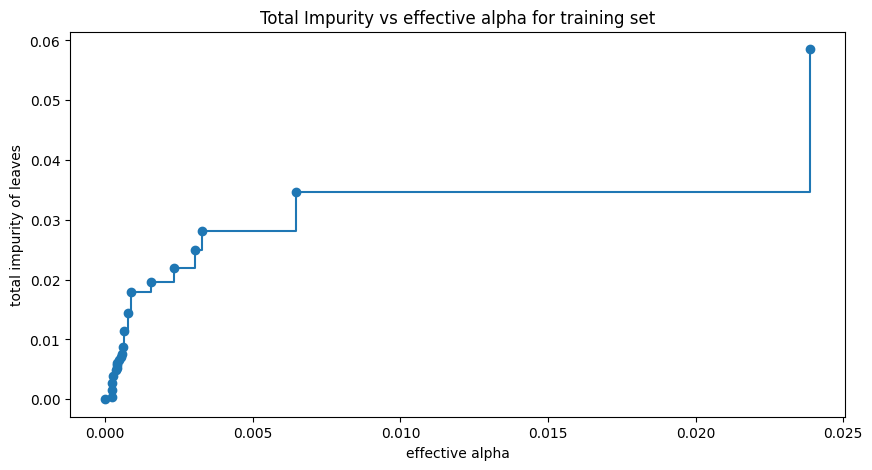

In [83]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('Total Impurity vs effective alpha for training set')
plt.show()

* Next, we train a decision tree using the effective alphas. The last value in `ccp_alphas` is the alpha value that prunes the whole tree, leaving the tree, `clfs[-1]`, with one node.

In [84]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    'Number of nodes in the last tree is: {} with ccp_alpha: {}'.format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


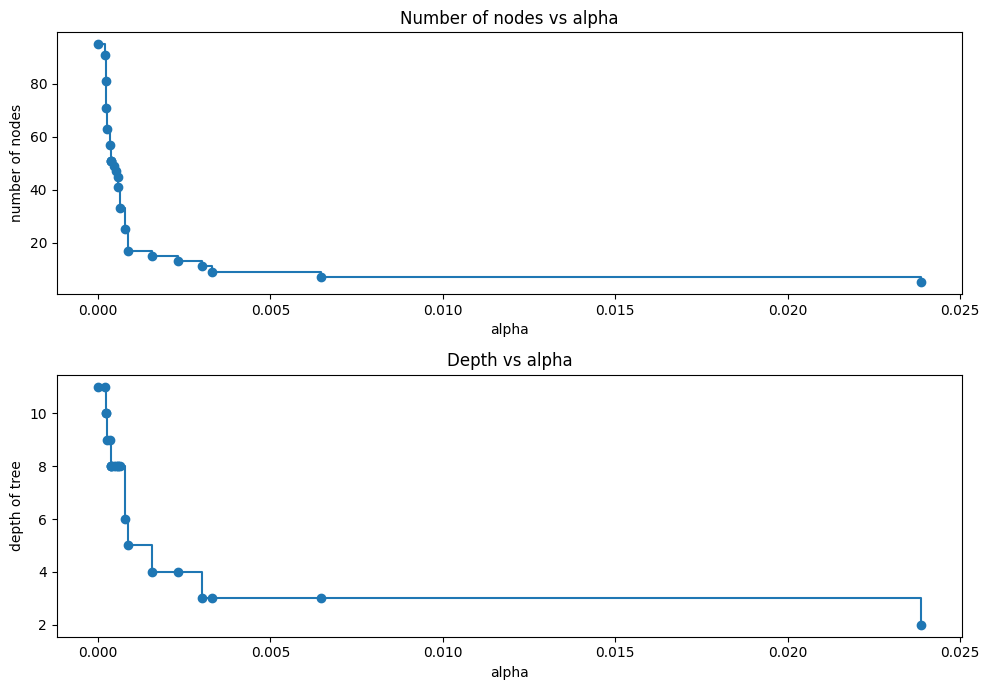

In [85]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle='steps-post')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('number of nodes')
ax[0].set_title('Number of nodes vs alpha')
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle='steps-post')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('depth of tree')
ax[1].set_title('Depth vs alpha')
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [86]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

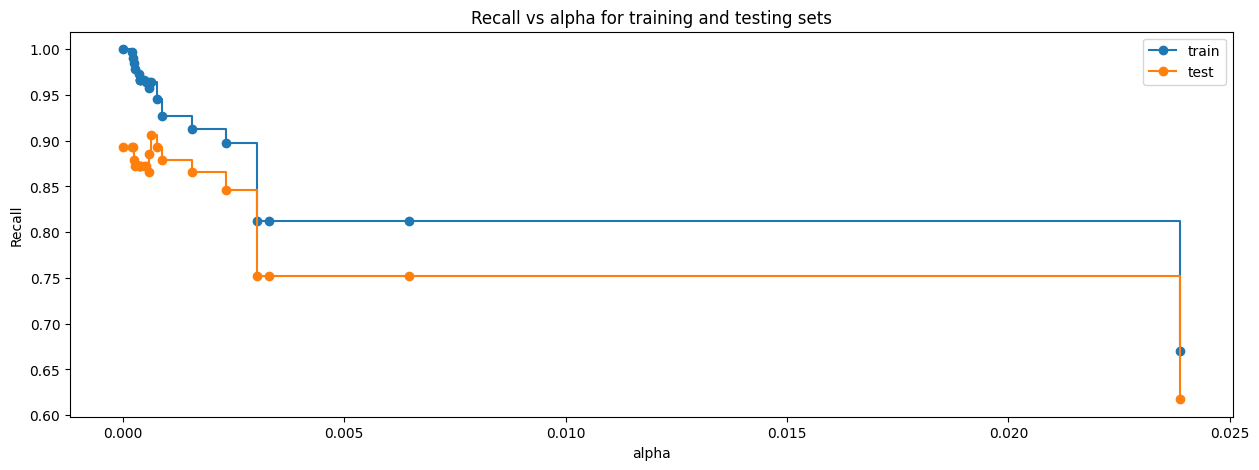

In [87]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel('alpha')
ax.set_ylabel('Recall')
ax.set_title('Recall vs alpha for training and testing sets')
ax.plot(ccp_alphas, recall_train, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, recall_test, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [88]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


**Post-Purning**

In [89]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.000641, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.000641, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

**Checking performance on training data**

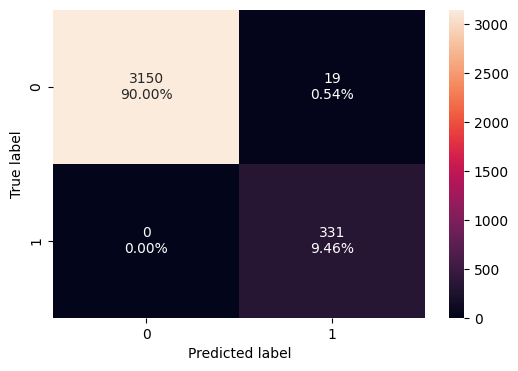

In [90]:
confusion_matrix_sklearn(estimator_2, X_train, y_train)

In [91]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.994571,1.0,0.945714,0.9721


**checking performance on test set**

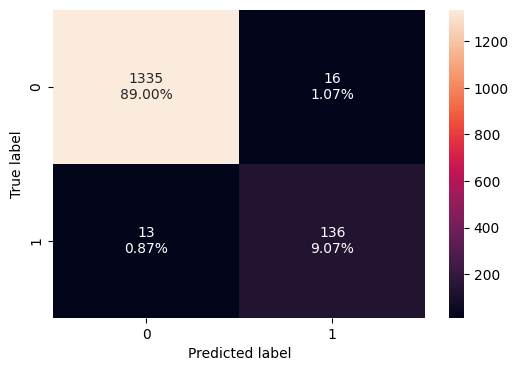

In [92]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)

In [93]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.980667,0.912752,0.894737,0.903654


**Visualizing the Decision Tree**

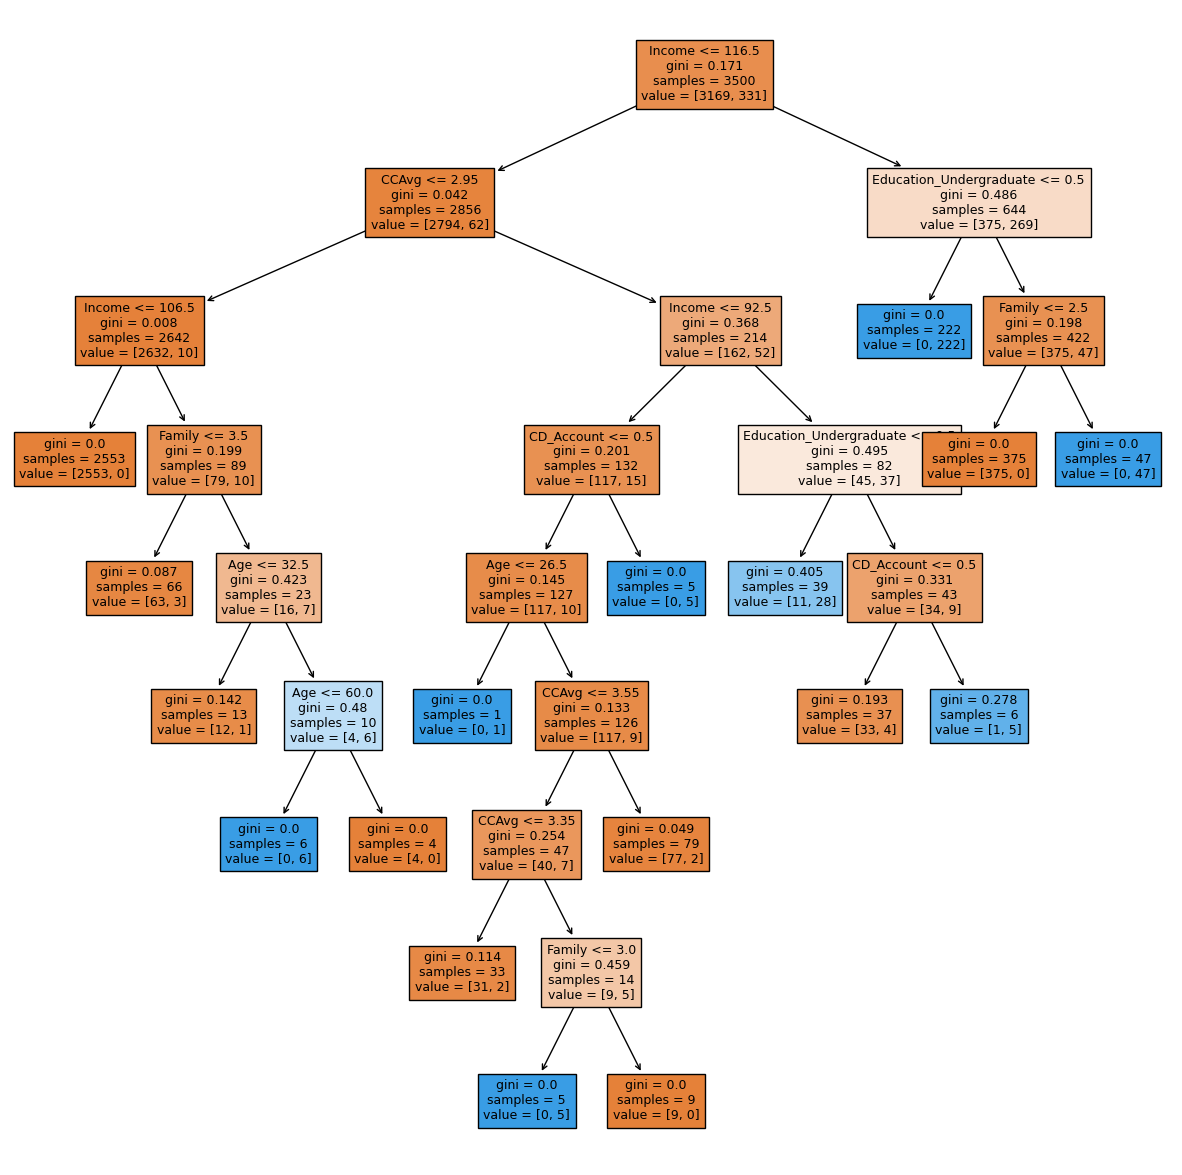

In [94]:
plt.figure(figsize=(15, 15))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [95]:
print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- weights: [0.15, 1.70] class: 1
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- weights: [6.15, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_91 >  0.50
|   |   |   |   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- Age >  46.00
|   |   |   |   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- Mortgage <= 152.00
|   |   |   |   |   |   |-

In [96]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=['Imp'], index=X_train.columns
    ).sort_values(by='Imp', ascending=False)
)

                              Imp
Income                   0.602209
Family                   0.146348
Education_Undergraduate  0.125135
CCAvg                    0.086360
Age                      0.011881
CD_Account               0.011166
Mortgage                 0.004929
Securities_Account       0.004788
ZIPCode_92               0.002996
ZIPCode_91               0.002635
ZIPCode_93               0.001552
ZIPCode_95               0.000000
ZIPCode_94               0.000000
CreditCard               0.000000
Education_Professional   0.000000
Online                   0.000000
ZIPCode_96               0.000000


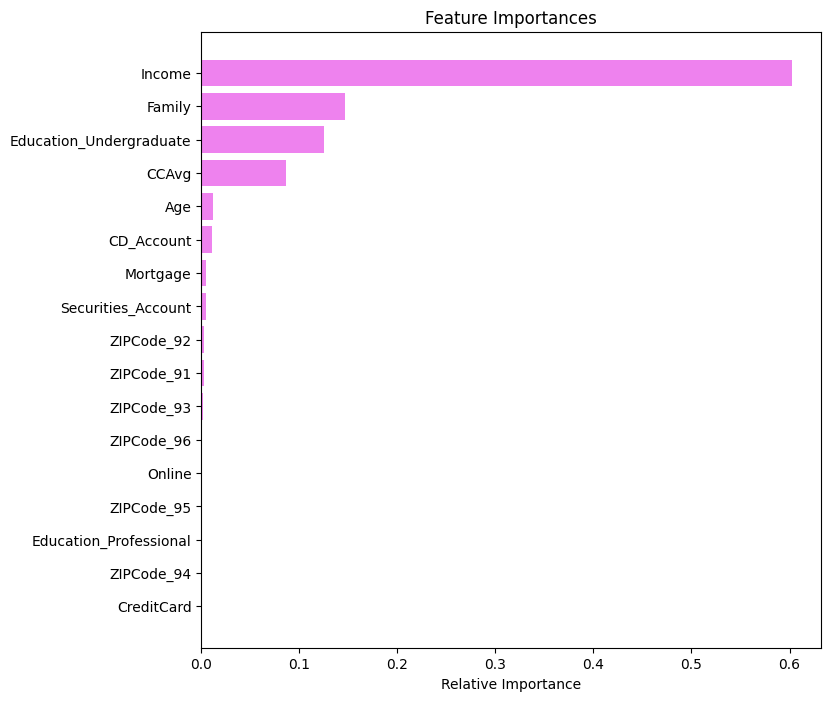

In [97]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model Comparison and Final Model Selection

In [98]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T,decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ['Decision Tree sklearn', 'Decision Tree (Pre-Pruning)','Decision Tree (Post-Pruning)']
print('Training performance comparison:')
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.990286,0.994571
Recall,1.0,0.927492,1.000000
Precision,1.0,0.968454,0.945714
F1,1.0,0.947531,0.972100


In [99]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T,decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ['Decision Tree sklearn', 'Decision Tree (Pre-Pruning)','Decision Tree (Post-Pruning)']
print('Training performance comparison:')
models_test_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.978667,0.980000,0.980667
Recall,0.892617,0.865772,0.912752
Precision,0.892617,0.928058,0.894737
F1,0.892617,0.895833,0.903654


* The decision tree model with pre-pruning has achieved the highest recall score on the training data.
* Both the pre-pruned and post-pruned models have mitigated overfitting, leading to a more generalized and consistent model performance.

## Actionable Insights and Business Recommendations


* The primary objective of the marketing or sales team should be to avoid missing any opportunities, which means ensuring there is minimal likelihood of predicting that a customer would not acquire a personal loan when they would actually have borrowed one. This goal is accomplished by minimizing the occurrence of `false negatives` in our predictions.
* The important features in the tree building are `Income`, `Family`, `Education_Undergraduate`, and `CCAvg`.
* We used decision trees with both `pre-pruning` and `post-pruning` techniques. Notably, the `post-pruning decision tree` model delivered a remarkable `91% recall` alongside an impressive `98% accuracy`. `Decision Trees` are known for their ease of training and interpretability. Consequently, it seems that this model is the optimal choice for our use case.
* According to the decision tree analysis, factors such as `Income`, `customers educations`, and customers with `higher family sizes` emerge as some of the most significant predictors for estimating the likelihood of a customer taking out a Personal Loan.

___

*  Make the most of the information available. Utilize customer data like `income`, `education level`, and `higher family sizes` to personalize `loan offers`.
* Create customized marketing campaigns for different customer segments. Tailor messages and offers based on their likelihood to accept `personal loans`. For example, `offer higher loan` amounts to customers with `higher incomes` and attractive interest rates to those with a history of using the bank's services.
* Promote `internet banking facilities` and `online loan application` processes. Ensure an intuitive and user-friendly online interface to cater to customers who prefer digital interactions.
* Continuously monitor the results of marketing campaigns and adjust strategies based on performance metrics. Regularly assess the model's performance and refine it as needed.